
# 1. ***Data Cleaning and Preparation***
---

1.   Loading Data
2.   Handling Missing Values
3.   Data Transformation
4.   Data Splitting

---
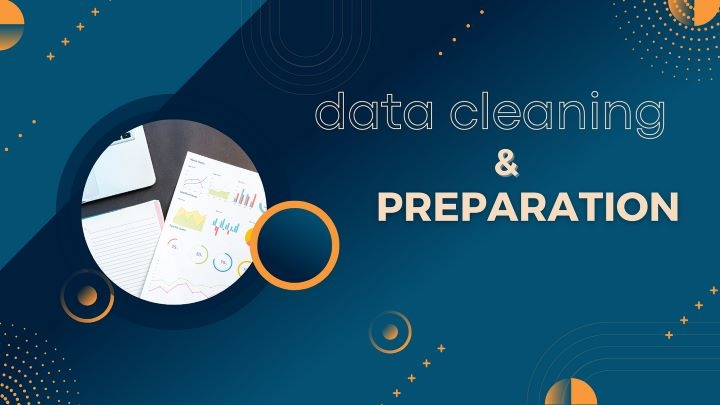






# 1.1. Loading Data

---

 - Load the datasets.
 - Display the first few rows of each dataset to understand its structure.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**importing necessary libraries**


*   NumPy (for numerical evaluation)
*   Pandas (to manipulate datasets)
*   MatPlotLib (for visualization of data)
*   sklearn (for data transformation and other preprocessing operations)





In [3]:
weather_classification_data= r"/weather_classification_data.csv"
dataset=pd.read_csv(weather_classification_data)

* *Imported the dataset of weather_classification and read it via Pandas*

In [4]:
dataset.head()

Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
0         14.0        73         9.5               82.0  partly cloudy   
1         39.0        96         8.5               71.0  partly cloudy   
2         30.0        64         7.0               16.0          clear   
3         38.0        83         1.5               82.0          clear   
4         27.0        74        17.0               66.0       overcast   

   Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  \
0               1010.82         2  Winter              3.5    inland   
1               1011.43         7  Spring             10.0    inland   
2               1018.72         5  Spring              5.5  mountain   
3               1026.25         7  Spring              1.0   coastal   
4                990.67         1  Winter              2.5  mountain   

  Weather Type  
0        Rainy  
1       Cloudy  
2        Sunny  
3        Sunny  
4        Rainy

showing first fews rows of the given dataset by using  *.head()* command
\
By this , we get to know that the given dataset comprises of :
* Temperature (numeric): The temperature in degrees Celsius, ranging from extreme cold to extreme heat.
* Humidity (numeric): The humidity percentage, including values above 100% to introduce outliers.
* Wind Speed (numeric): The wind speed in kilometers per hour, with a range including unrealistically high values.
* Precipitation (%) (numeric): The precipitation percentage, including outlier values.
* Cloud Cover (categorical): The cloud cover description.
* Atmospheric Pressure (numeric): The atmospheric pressure in hPa, covering a wide range.
* UV Index (numeric): The UV index, indicates the strength of ultraviolet radiation.
* Season (categorical): The season during which the data was recorded.
* Visibility (km) (numeric): The visibility in kilometers, including very low or very high values.
* Location (categorical): The type of location where the data was recorded.
* Weather Type (categorical): The target variable for classification, indicating the weather type.




In [5]:
dataset.shape

(13200, 11)

# 1.2. Handling Missing Values


---

* Identify and handle missing values in both datasets.
* Provide a justification for the methods used to handle missing data.

In [ ]:
#checking for missing values in columns
na_in_col=dataset.isnull().sum()
#checking for missing values in rows
na_in_rows=dataset.isnull().any(axis=1).sum()
print(f'Number of missing values in columns:\n{na_in_col}')
print(f'Number of missing values in rows:\n{na_in_rows}')

Number of missing values in columns:
Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64
Number of missing values in rows:
0


As shown here:
**There is NO missing value in the given DataSet**\
There is NO need to deal with operations to tackle with missing values in this DataSet


# 1.3. Data Transformation
* Convert categorical variables to numerical variables using appropriate encoding techniques (e.g., one-hot encoding, label encoding).
* Normalize/standardize the numerical features.


In [6]:
#printing datatypes of columns
print(f'The datatype of all columns are:\n\n{dataset.dtypes}')

#printing encodable columns i.e., with dtype: object
encodable_cols=dataset.select_dtypes(include='object',exclude=['int64','float64']).columns
print('\n\nThe list of columns with datatype: object is\n')
for col in encodable_cols:
  print(col)

The datatype of all columns are:

Temperature             float64
Humidity                  int64
Wind Speed              float64
Precipitation (%)       float64
Cloud Cover              object
Atmospheric Pressure    float64
UV Index                  int64
Season                   object
Visibility (km)         float64
Location                 object
Weather Type             object
dtype: object


The list of columns with datatype: object is

Cloud Cover
Season
Location
Weather Type


**One-Hot Encoding**

One-hot encoding is a technique that creates a new binary column for each unique category in the original categorical variable. Each row is then assigned a value of 1 in the column corresponding to its category, and 0 in all other columns

\
***Following colums are encodable via One-Hot technique***
* Season
* Location

(the categories DO NOT have a natural order or hierarchy)

\

**Label Encoding**

Label encoding is a simpler technique that assigns a unique numerical label to each category. This is useful when the categories have a natural ordering or hierarchy, such as "low", "medium", "high".

\
***Following colums are encodable via Label-Encoding technique***
* Cloud Cover

(the categories have a natural order or hierarchy)


>>* Weather Type is not Encodable 'cause it is our target to predict..

In [7]:
# One-Hot Technique
#getting labels of the columns : Season , Location
lab_season=dataset['Season'].unique()
lab_location=dataset['Location'].unique()
#displaying Labels of the colums: Season, Location
print(f'Labels of Season : \n\t{lab_season}')
print(f'Labels of Location : \n\t{lab_location}\n\n')
#getting dummies via pandas for One-Hot technique
enc_dataset=pd.get_dummies(dataset, columns=['Season','Location'], dtype=int)
enc_dataset

Labels of Season : 
	['Winter' 'Spring' 'Summer' 'Autumn']
Labels of Location : 
	['inland' 'mountain' 'coastal']




Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
0             14.0        73         9.5               82.0  partly cloudy   
1             39.0        96         8.5               71.0  partly cloudy   
2             30.0        64         7.0               16.0          clear   
3             38.0        83         1.5               82.0          clear   
4             27.0        74        17.0               66.0       overcast   
...            ...       ...         ...                ...            ...   
13195         10.0        74        14.5               71.0       overcast   
13196         -1.0        76         3.5               23.0         cloudy   
13197         30.0        77         5.5               28.0       overcast   
13198          3.0        76        10.0               94.0       overcast   
13199         -5.0        38         0.0               92.0       overcast   

       Atmospheric Pressure  UV Index  Visibility (km) Weather Type  \
0                   1010.82         2              3.5        Rainy   
1                   1011.43         7             10.0       Cloudy   
2                   1018.72         5              5.5        Sunny   
3                   1026.25         7              1.0        Sunny   
4                    990.67         1              2.5        Rainy   
...                     ...       ...              ...          ...   
13195               1003.15         1              1.0        Rainy   
13196               1067.23         1              6.0        Snowy   
13197               1012.69         3              9.0       Cloudy   
13198                984.27         0              2.0        Snowy   
13199               1015.37         5             10.0        Rainy   

       Season_Autumn  Season_Spring  Season_Summer  Season_Winter  \
0                  0              0              0              1   
1                  0              1              0              0   
2                  0              1              0              0   
3                  0              1              0              0   
4                  0              0              0              1   
...              ...            ...            ...            ...   
13195              0              0              1              0   
13196              0              0              0              1   
13197              1              0              0              0   
13198              0              0              0              1   
13199              1              0              0              0   

       Location_coastal  Location_inland  Location_mountain  
0                     0                1                  0  
1                     0                1                  0  
2                     0                0                  1  
3                     1                0                  0  
4                     0                0                  1  
...                 ...              ...                ...  
13195                 0                0                  1  
13196                 1                0                  0  
13197                 1                0                  0  
13198                 0                1                  0  
13199                 0                0                  1  

[13200 rows x 16 columns]

**Getting and Displaying Labels in Columns: Season, Location**

\

To see if these columns don't have an order or a hierarchy in their labels and are thus suitable for *One-Hot Encoding Technique*

\

**Applying One-Hot Technique**

\

By using pd.get_dummies()
* here *dtype=int* argument results in binary replacements for the object/str labels
* it results in increasing the number of columns from 11 to 16 as *dataset['Season']*  splits into 4 other columns and *dataset['Location']*
 splits into 3 other columns on the basis of number of labels in these columns

In [8]:
#LabelEncoding Technique
#getting labels of the columns : Cloud Cover , Weather Type
lab_Cloud_Cover=dataset['Cloud Cover'].unique()
lab_Weather_Type=dataset['Weather Type'].unique()
#displaying Labels of the colums: Season, Location
print(f'Labels of Season : \n\t{lab_Cloud_Cover}')
print(f'Labels of Weather Type : \n\t{lab_Weather_Type}\n\n')

#Applying LabelEncoding Technique
from sklearn.preprocessing import LabelEncoder as encoder
enc_dataset['Cloud Cover']=encoder().fit_transform(enc_dataset['Cloud Cover'])
#enc_dataset['Weather Type']=encoder().fit_transform(enc_dataset['Weather Type'])
enc_dataset

Labels of Season : 
	['partly cloudy' 'clear' 'overcast' 'cloudy']
Labels of Weather Type : 
	['Rainy' 'Cloudy' 'Sunny' 'Snowy']




Temperature  Humidity  Wind Speed  Precipitation (%)  Cloud Cover  \
0             14.0        73         9.5               82.0            3   
1             39.0        96         8.5               71.0            3   
2             30.0        64         7.0               16.0            0   
3             38.0        83         1.5               82.0            0   
4             27.0        74        17.0               66.0            2   
...            ...       ...         ...                ...          ...   
13195         10.0        74        14.5               71.0            2   
13196         -1.0        76         3.5               23.0            1   
13197         30.0        77         5.5               28.0            2   
13198          3.0        76        10.0               94.0            2   
13199         -5.0        38         0.0               92.0            2   

       Atmospheric Pressure  UV Index  Visibility (km) Weather Type  \
0                   1010.82         2              3.5        Rainy   
1                   1011.43         7             10.0       Cloudy   
2                   1018.72         5              5.5        Sunny   
3                   1026.25         7              1.0        Sunny   
4                    990.67         1              2.5        Rainy   
...                     ...       ...              ...          ...   
13195               1003.15         1              1.0        Rainy   
13196               1067.23         1              6.0        Snowy   
13197               1012.69         3              9.0       Cloudy   
13198                984.27         0              2.0        Snowy   
13199               1015.37         5             10.0        Rainy   

       Season_Autumn  Season_Spring  Season_Summer  Season_Winter  \
0                  0              0              0              1   
1                  0              1              0              0   
2                  0              1              0              0   
3                  0              1              0              0   
4                  0              0              0              1   
...              ...            ...            ...            ...   
13195              0              0              1              0   
13196              0              0              0              1   
13197              1              0              0              0   
13198              0              0              0              1   
13199              1              0              0              0   

       Location_coastal  Location_inland  Location_mountain  
0                     0                1                  0  
1                     0                1                  0  
2                     0                0                  1  
3                     1                0                  0  
4                     0                0                  1  
...                 ...              ...                ...  
13195                 0                0                  1  
13196                 1                0                  0  
13197                 1                0                  0  
13198                 0                1                  0  
13199                 0                0                  1  

[13200 rows x 16 columns]

**Getting and Displaying Labels in Columns: Cloud Cover, Weather Type**

\

To see if these columns 'have' an order or a hierarchy in their labels and are thus suitable for One-Hot Encoding Technique

\

**Applying LabelEncoding Technique**

\

By using sklearn.preprocessing.LabelEncoder()
* the .fit_transform() method performs the following:
1. Fitting: It learns the mapping from the categories in the input data to a range
of integers (0 to n_classes-1, where n_classes is the number of unique categories).
2. Transforming: It replaces each category value with its corresponding integer label based on the learned mapping.
* it results in NO increament in the number of columns because no new column is formed .The already-existed columns are encoded/modified

In [9]:
from sklearn.preprocessing import MinMaxScaler as Scaler
enc_dataset[[norm_col for norm_col in enc_dataset.columns if norm_col not in ['Season', 'Location','Weather Type']]]=Scaler().fit_transform(enc_dataset[[col for col in enc_dataset.columns if col not in ['Season','Location','Weather Type']]])
enc_dataset

Temperature  Humidity  Wind Speed  Precipitation (%)  Cloud Cover  \
0         0.291045  0.595506    0.195876           0.752294     1.000000   
1         0.477612  0.853933    0.175258           0.651376     1.000000   
2         0.410448  0.494382    0.144330           0.146789     0.000000   
3         0.470149  0.707865    0.030928           0.752294     0.000000   
4         0.388060  0.606742    0.350515           0.605505     0.666667   
...            ...       ...         ...                ...          ...   
13195     0.261194  0.606742    0.298969           0.651376     0.666667   
13196     0.179104  0.629213    0.072165           0.211009     0.333333   
13197     0.410448  0.640449    0.113402           0.256881     0.666667   
13198     0.208955  0.629213    0.206186           0.862385     0.666667   
13199     0.149254  0.202247    0.000000           0.844037     0.666667   

       Atmospheric Pressure  UV Index  Visibility (km) Weather Type  \
0                  0.527951  0.142857            0.175        Rainy   
1                  0.529480  0.500000            0.500       Cloudy   
2                  0.547746  0.357143            0.275        Sunny   
3                  0.566614  0.500000            0.050        Sunny   
4                  0.477461  0.071429            0.125        Rainy   
...                     ...       ...              ...          ...   
13195              0.508732  0.071429            0.050        Rainy   
13196              0.669298  0.071429            0.300        Snowy   
13197              0.532637  0.214286            0.450       Cloudy   
13198              0.461425  0.000000            0.100        Snowy   
13199              0.539352  0.357143            0.500        Rainy   

       Season_Autumn  Season_Spring  Season_Summer  Season_Winter  \
0                0.0            0.0            0.0            1.0   
1                0.0            1.0            0.0            0.0   
2                0.0            1.0            0.0            0.0   
3                0.0            1.0            0.0            0.0   
4                0.0            0.0            0.0            1.0   
...              ...            ...            ...            ...   
13195            0.0            0.0            1.0            0.0   
13196            0.0            0.0            0.0            1.0   
13197            1.0            0.0            0.0            0.0   
13198            0.0            0.0            0.0            1.0   
13199            1.0            0.0            0.0            0.0   

       Location_coastal  Location_inland  Location_mountain  
0                   0.0              1.0                0.0  
1                   0.0              1.0                0.0  
2                   0.0              0.0                1.0  
3                   1.0              0.0                0.0  
4                   0.0              0.0                1.0  
...                 ...              ...                ...  
13195               0.0              0.0                1.0  
13196               1.0              0.0                0.0  
13197               1.0              0.0                0.0  
13198               0.0              1.0                0.0  
13199               0.0              0.0                1.0  

[13200 rows x 16 columns]

**3.2 Normalization and Standardization**


* Normalization and standardization are techniques used to scale numerical features to a common range.
* This is often necessary when the features have different scales or units, as some machine learning algorithms are sensitive to the scale of the input features.

**1. Normalization (Min-Max Scaling)**


Normalization scales the features to a common range, typically between 0 and 1. This is done by subtracting the minimum value and dividing by the range (maximum - minimum) of the feature.
python.

**2. Standardization (Z-score Normalization)**

Standardization scales the features to have a mean of 0 and a standard deviation of 1. This is done by subtracting the mean and dividing by the standard deviation of the feature.

\

**Choice between Normalization (Min-Max Scaling) and Standardization (Z-score Normalization)**

**Algorithm Sensitivity**:

* **Normalization (Min-Max Scaling):** Suitable for algorithms that are not sensitive to the scale of the features, such as decision trees and random forests.
* **Standardization (Z-score Normalization):** Preferred for algorithms that are sensitive to the scale of the features, such as linear regression, logistic regression, and neural networks, as it can improve the convergence of the optimization algorithms.

>>Since this model is for  *'Classification'*   , thus, choosing **Normalization (Min-Max Scaling)** over **Standardization (Z-score Normalization)**


>>it results in NO increament in the number of columns because no new column is formed .The already-existed columns are encoded/modified

# 1.4. Data Splitting
 * Split the data into training and testing sets using an 80-20 split

In [10]:
#Defining Features and Targets
X=enc_dataset.drop(['Weather Type'],axis=1)
Y=enc_dataset['Weather Type']

#importing sklearn.model_selection.train_test_split
from sklearn.model_selection import train_test_split as tts

#spling data into training and testing sets
X_Train, X_Test, Y_Train, Y_Test= tts(X,Y, test_size=0.2, random_state=1)



**Importance of Data Spliting**

There are a few key reasons why the 80-20 split is a commonly used approach for splitting data into training and testing sets:

1. **Model Generalization**: The primary purpose of splitting the data is to evaluate how well the model will generalize to new, unseen data.
2. **Variance Reduction**: With less training data, the parameter estimates of the model will have higher variance. Conversely, with less testing data, the performance metrics calculated on the test set will have higher variance.
3. **Computational Efficiency**: Splitting the data 80-20 is computationally efficient, as it requires *training the model* only once on the training set, and then *evaluating* it once on the test set.


The output of train_test_split() is four variables:
* X_train: The feature data for the training set.
* X_test: The feature data for the testing set.
* y_train: The target variable data for the training set.
* y_test: The target variable data for the testing set.

In [11]:
#displaying the shape of split data
print(f'Shape of X: {X.shape}')
print(f'Shape of Y: {Y.shape}')
print(f'Shape of X_Train: {X_Train.shape}')
print(f'Shape of Y_Train: {Y_Train.shape}')
print(f'Shape of X_Test: {X_Test.shape}')
print(f'Shape of Y_Test: {Y_Test.shape}')

Shape of X: (13200, 15)
Shape of Y: (13200,)
Shape of X_Train: (10560, 15)
Shape of Y_Train: (10560,)
Shape of X_Test: (2640, 15)
Shape of Y_Test: (2640,)


# 2. ***Data Analysis and Visualization***


---

1. Exploratory Data Analysis (EDA)
2. Visualization



---

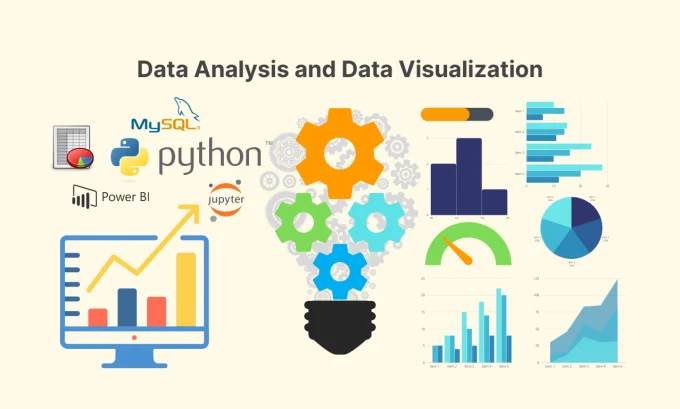


# 2.1.  Exploratory Data Analysis (EDA)


---


   - Perform EDA on the datasets to identify key patterns, correlations, and insights.
   - Generate summary statistics (mean, median, standard deviation, etc.) for the datasets.
   - Identify any patterns, correlations, or anomalies in the data.


In [12]:
# Generate summary statistics for each column in the dataset
for col in dataset.columns:
    print(f'For {col} : \n')
    print(dataset[col].describe())
    print('-'*50)

For Temperature : 

count    13200.000000
mean        19.127576
std         17.386327
min        -25.000000
25%          4.000000
50%         21.000000
75%         31.000000
max        109.000000
Name: Temperature, dtype: float64
--------------------------------------------------
For Humidity : 

count    13200.000000
mean        68.710833
std         20.194248
min         20.000000
25%         57.000000
50%         70.000000
75%         84.000000
max        109.000000
Name: Humidity, dtype: float64
--------------------------------------------------
For Wind Speed : 

count    13200.000000
mean         9.832197
std          6.908704
min          0.000000
25%          5.000000
50%          9.000000
75%         13.500000
max         48.500000
Name: Wind Speed, dtype: float64
--------------------------------------------------
For Precipitation (%) : 

count    13200.000000
mean        53.644394
std         31.946541
min          0.000000
25%         19.000000
50%         58.000000
75%    

In [13]:
# Generate summary statistics for numerical features
dataset.describe()

Temperature      Humidity    Wind Speed  Precipitation (%)  \
count  13200.000000  13200.000000  13200.000000       13200.000000   
mean      19.127576     68.710833      9.832197          53.644394   
std       17.386327     20.194248      6.908704          31.946541   
min      -25.000000     20.000000      0.000000           0.000000   
25%        4.000000     57.000000      5.000000          19.000000   
50%       21.000000     70.000000      9.000000          58.000000   
75%       31.000000     84.000000     13.500000          82.000000   
max      109.000000    109.000000     48.500000         109.000000   

       Atmospheric Pressure      UV Index  Visibility (km)  
count          13200.000000  13200.000000     13200.000000  
mean            1005.827896      4.005758         5.462917  
std               37.199589      3.856600         3.371499  
min              800.120000      0.000000         0.000000  
25%              994.800000      1.000000         3.000000  
50%             1007.650000      3.000000         5.000000  
75%             1016.772500      7.000000         7.500000  
max             1199.210000     14.000000        20.000000

In [14]:
# getting the information about the each column in the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [15]:
#checking for duplicate values
dataset.duplicated().sum()

np.int64(0)

In [16]:
# Check the correlation between features
corr_matrix=enc_dataset.drop(['Weather Type'], axis=1).corr()
print(corr_matrix)

                      Temperature  Humidity  Wind Speed  Precipitation (%)  \
Temperature              1.000000 -0.207969   -0.070022          -0.287206   
Humidity                -0.207969  1.000000    0.406079           0.638631   
Wind Speed              -0.070022  0.406079    1.000000           0.443770   
Precipitation (%)       -0.287206  0.638631    0.443770           1.000000   
Cloud Cover             -0.224642  0.277199    0.183863           0.267368   
Atmospheric Pressure     0.209188 -0.120653   -0.077757          -0.177444   
UV Index                 0.374773 -0.342694   -0.068147          -0.291601   
Visibility (km)          0.250751 -0.479969   -0.311828          -0.457444   
Season_Autumn            0.185445 -0.094839   -0.019549          -0.099665   
Season_Spring            0.185596 -0.099526   -0.048888          -0.112516   
Season_Summer            0.190761 -0.075871   -0.016584          -0.098157   
Season_Winter           -0.447272  0.215280    0.067943         

**A concise interpretation of the correlation matrix:**
* Temperature:
>> -Positively correlated with UV Index (0.375) and Visibility (0.251).
>> - Negatively correlated with Precipitation (-0.287) and Humidity (-0.208).

* Humidity:
>> - Strongly positively correlated with Precipitation (0.639) and moderately with Wind Speed (0.406).
>> - Strongly negatively correlated with Visibility (-0.480) and moderately with UV Index (-0.343).

* Wind Speed:
>> - Moderately positively correlated with Precipitation (0.444) and Humidity (0.406).
>> - Moderately negatively correlated with Visibility (-0.312).

* Precipitation:
>> - Strongly positively correlated with Humidity (0.639) and moderately with Wind Speed (0.444).
>> - Moderately negatively correlated with Visibility (-0.457) and Temperature (-0.287).

* Cloud Cover:
>> - Moderately negatively correlated with UV Index (-0.347) and Atmospheric Pressure (-0.096).

* Atmospheric Pressure:
>> - Weakly positively correlated with Temperature (0.209) and UV Index (0.154).

* UV Index:
>> - Moderately positively correlated with Temperature (0.375) and Visibility (0.363).
>> - Moderately negatively correlated with Humidity (-0.343) and Cloud Cover (-0.347).

* Visibility:
>> - Moderately positively correlated with Temperature (0.251) and UV Index (0.363).
>>- Strongly negatively correlated with Humidity (-0.480) and moderately with
Precipitation (-0.457).


This concise interpretation highlights the key correlations between the different features in the dataset, which can be useful for understanding the relationships and patterns in the data.

In [17]:
# getting info about occurance of each label in each categorical column in the dataset
for col in dataset.select_dtypes(include=['object'],exclude=['int64','float64']):
    print(dataset[col].value_counts())
    print("-"*50)


Cloud Cover
overcast         6090
partly cloudy    4560
clear            2139
cloudy            411
Name: count, dtype: int64
--------------------------------------------------
Season
Winter    5610
Spring    2598
Autumn    2500
Summer    2492
Name: count, dtype: int64
--------------------------------------------------
Location
inland      4816
mountain    4813
coastal     3571
Name: count, dtype: int64
--------------------------------------------------
Weather Type
Rainy     3300
Cloudy    3300
Sunny     3300
Snowy     3300
Name: count, dtype: int64
--------------------------------------------------


In [18]:
# Analyze categorical variables
unique_pattern=dataset[[col for col in dataset.select_dtypes(include=['object'],exclude=['int64','float64'])]].value_counts()
unique_pattern

Cloud Cover    Season  Location  Weather Type
overcast       Winter  inland    Snowy           1214
                       mountain  Snowy           1196
partly cloudy  Winter  mountain  Snowy            328
                       inland    Snowy            295
overcast       Spring  coastal   Rainy            201
                                                 ... 
cloudy         Summer  inland    Sunny              4
overcast       Autumn  inland    Snowy              4
               Winter  mountain  Sunny              4
cloudy         Summer  coastal   Cloudy             3
                       mountain  Cloudy             3
Name: count, Length: 156, dtype: int64

**The key insights from this output are:**
* The most frequent combination is overcast Winter conditions in inland and mountain locations with Snowy weather, with counts of 1214 and 1196 respectively.
* The next most frequent combinations are partly cloudy Winter conditions in mountain and inland locations with Snowy weather, with counts of 328 and 295 respectively.
* Overcast Spring conditions in coastal locations with Rainy weather have a count of 201.
* There are a few instances of cloudy Summer conditions in inland, coastal, and mountain locations with Sunny or Cloudy weather, each with counts of 4 or less.



>> Total number of unique combinations of Cloud Cover, Season, Location, Weather Type is 156


>> In the context of this cross-tabulation, the "count" column represents the frequency or number of occurrences for each unique combination of the categorical variables: Cloud Cover, Season, Location, and Weather Type.

# 2.2.  Visualization
---
>> Create various plots to visualize data:
* Histograms: To show the distribution of individual features.
* Scatter Plots: To show relationships between pairs of features.
* Box Plots: To identify outliers and understand the spread of data.
* Correlation Heatmaps: To visualize correlations between features.

---

>> Use Matplotlib to create these visualizations and ensure all plots are well-labeled and easy to interpret.


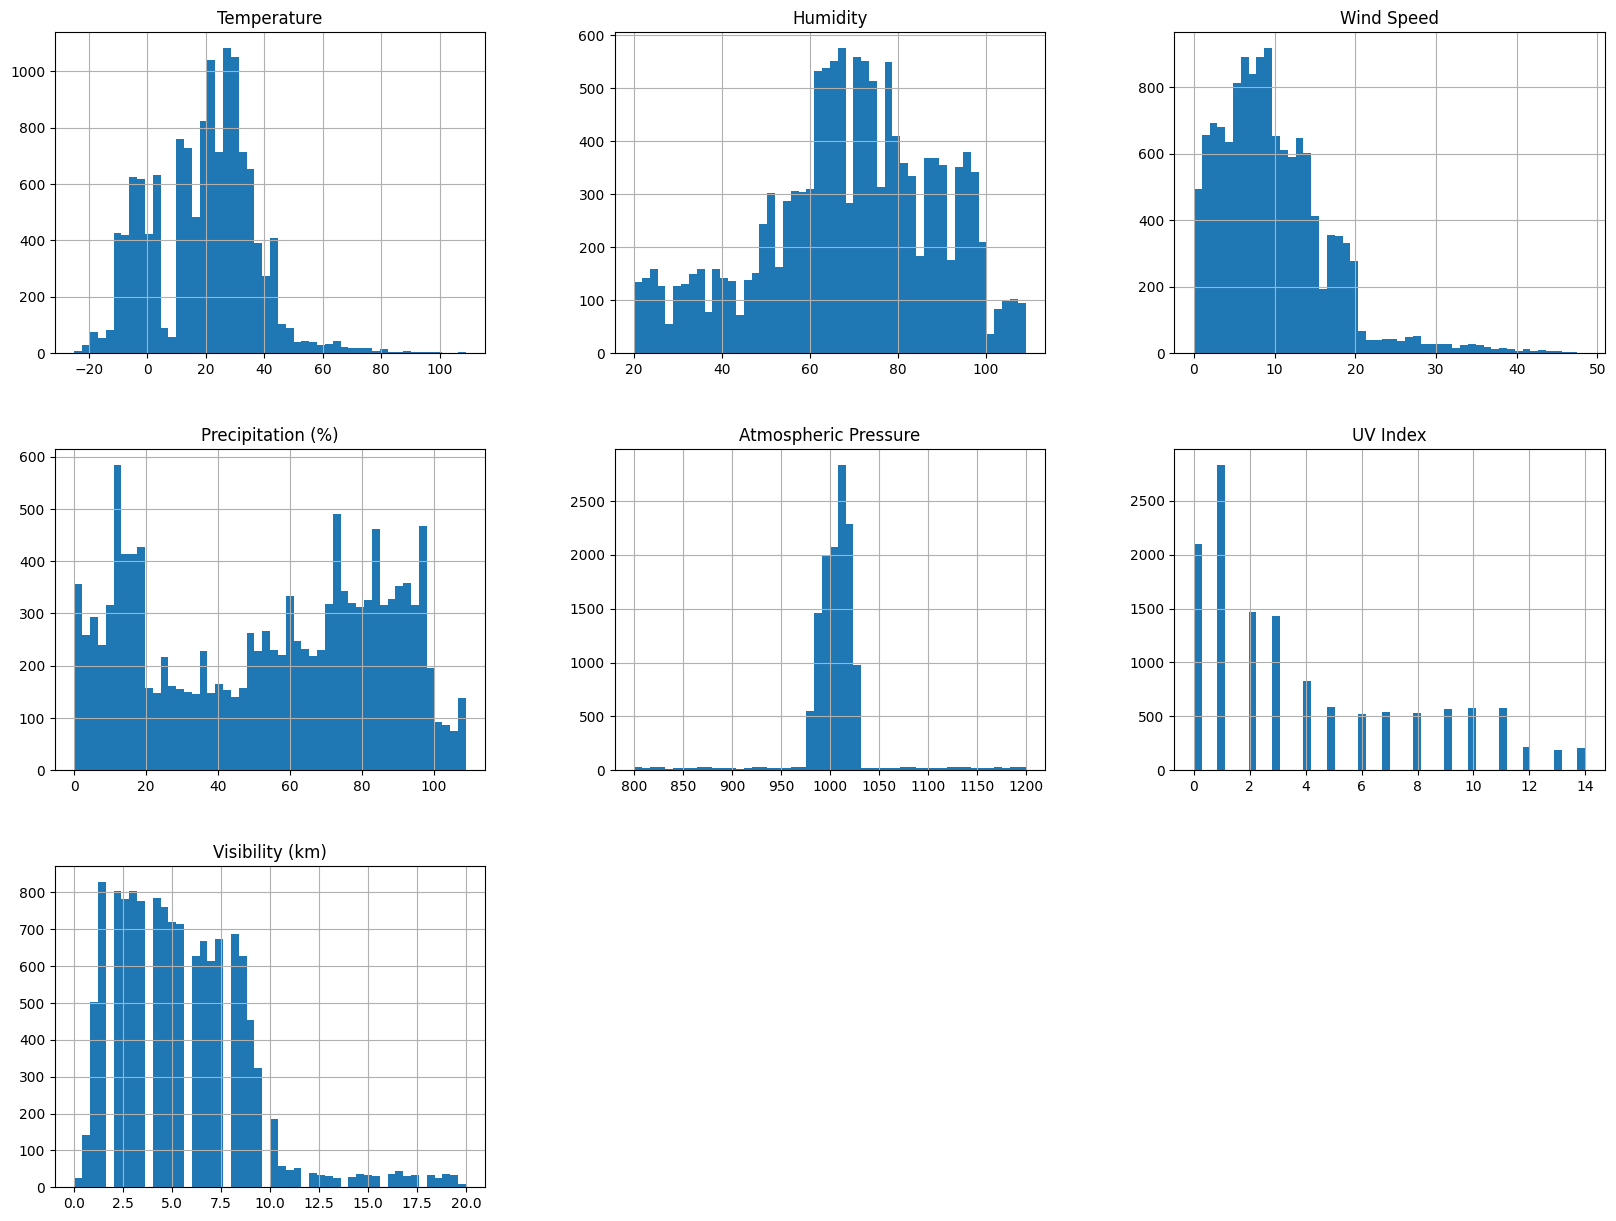

In [19]:
#Histograms: To show the distribution of individual features.
dataset.hist(bins=50,figsize=(20,15))
plt.show()

**Histogram**

* A *histogram* is a graphical representation that displays the distribution of a numerical dataset.

* It is a type of bar chart that shows the frequency or count of data points within different, non-overlapping intervals or "bins".


* The hist() method in Pandas is designed to create histograms for numerical columns in a DataFrame. It does not automatically handle categorical features, as histograms are not an appropriate visualization for categorical data.


Scatter Plots For Temperature
--------------------------------------------------


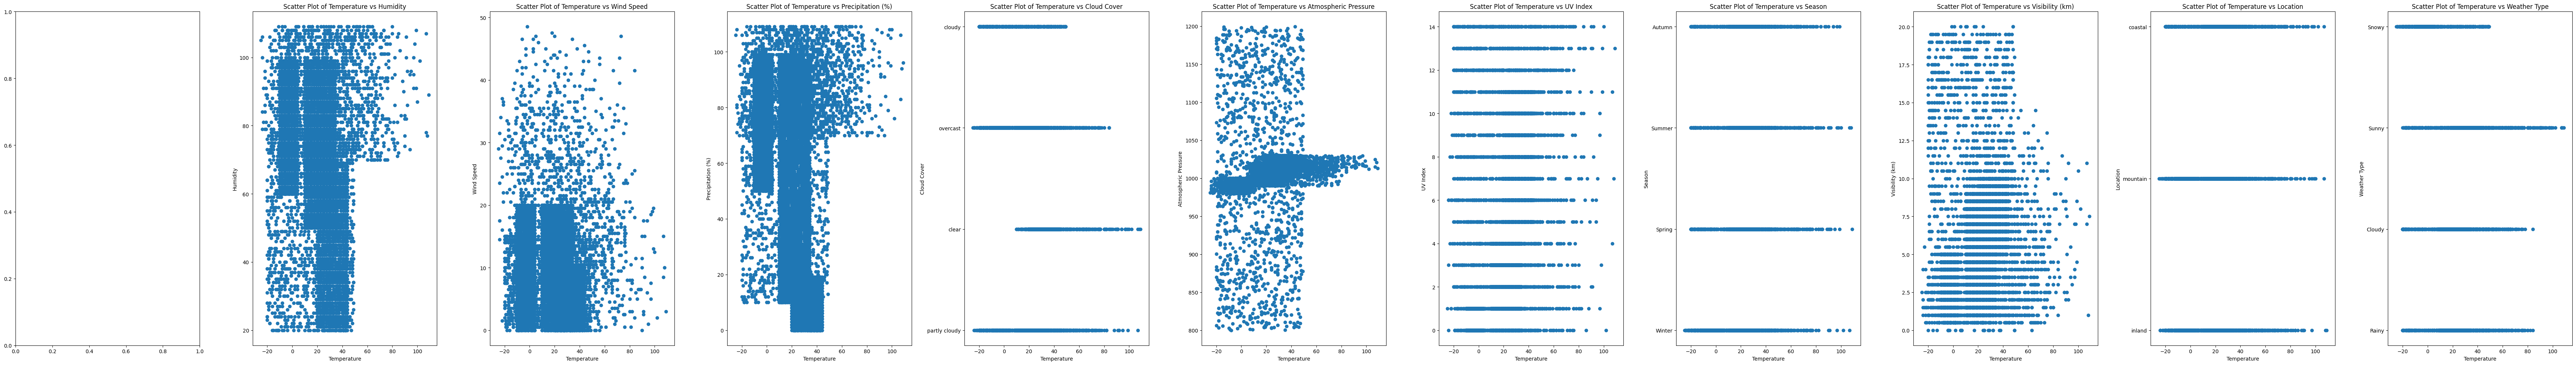

Scatter Plots For Humidity
--------------------------------------------------


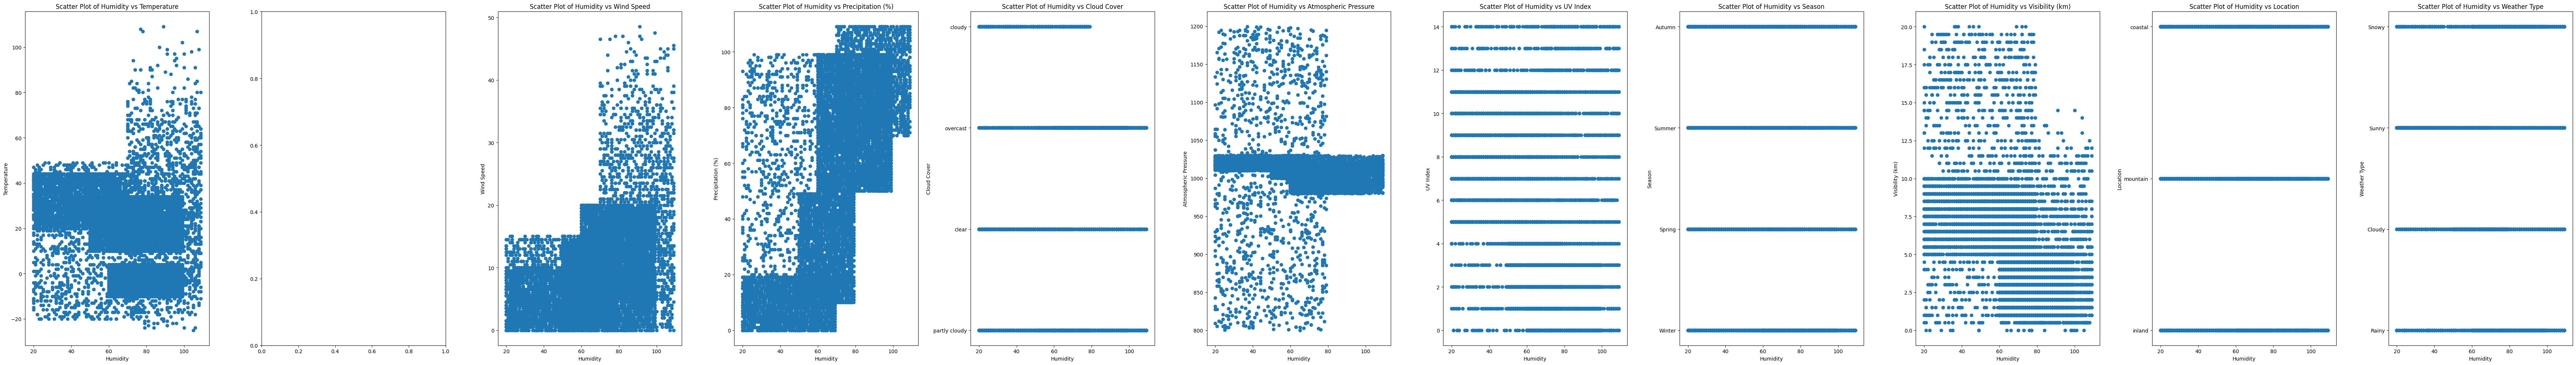

Scatter Plots For Wind Speed
--------------------------------------------------


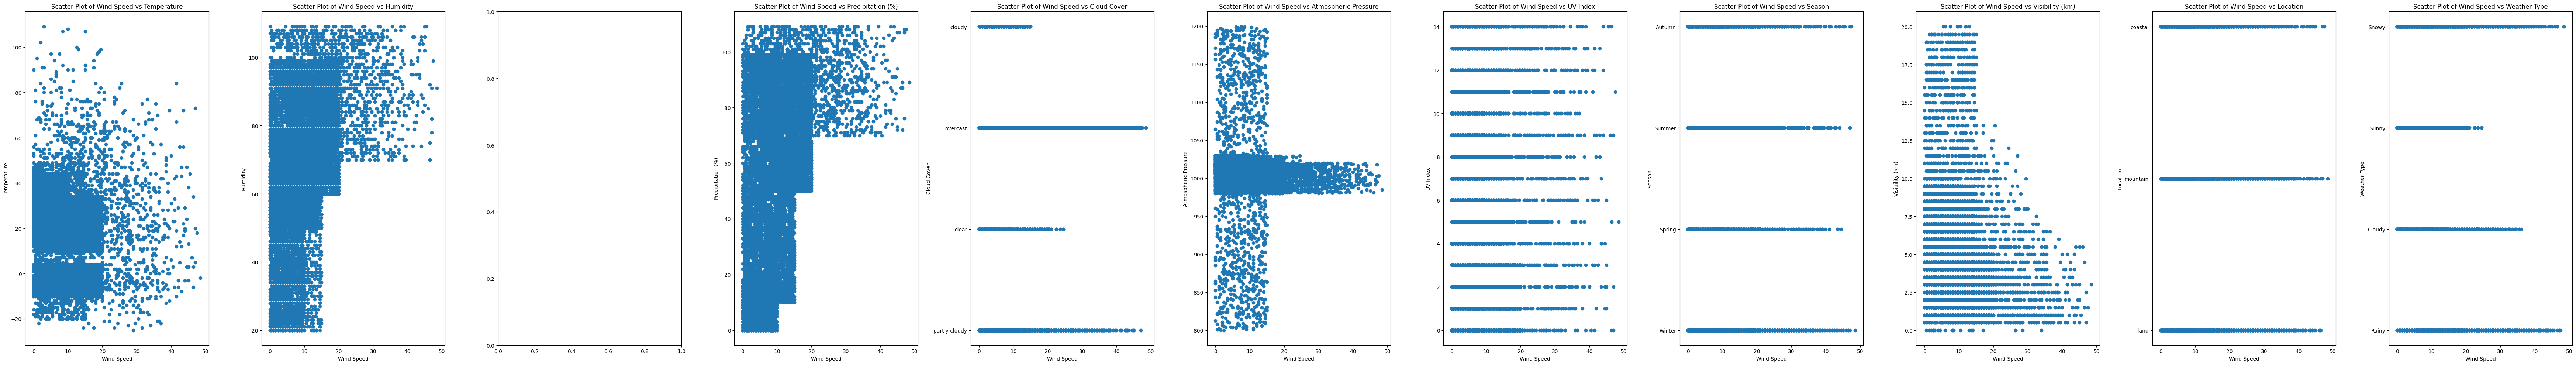

Scatter Plots For Precipitation (%)
--------------------------------------------------


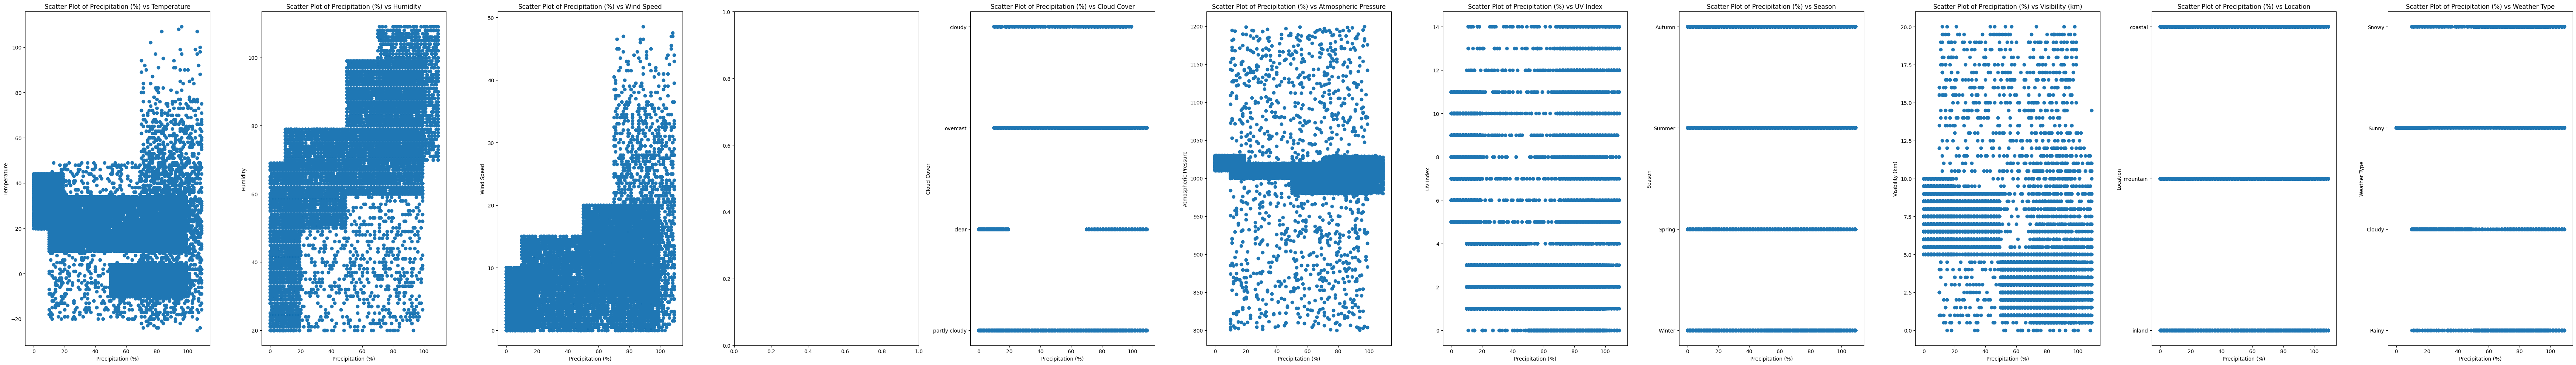

Scatter Plots For Cloud Cover
--------------------------------------------------


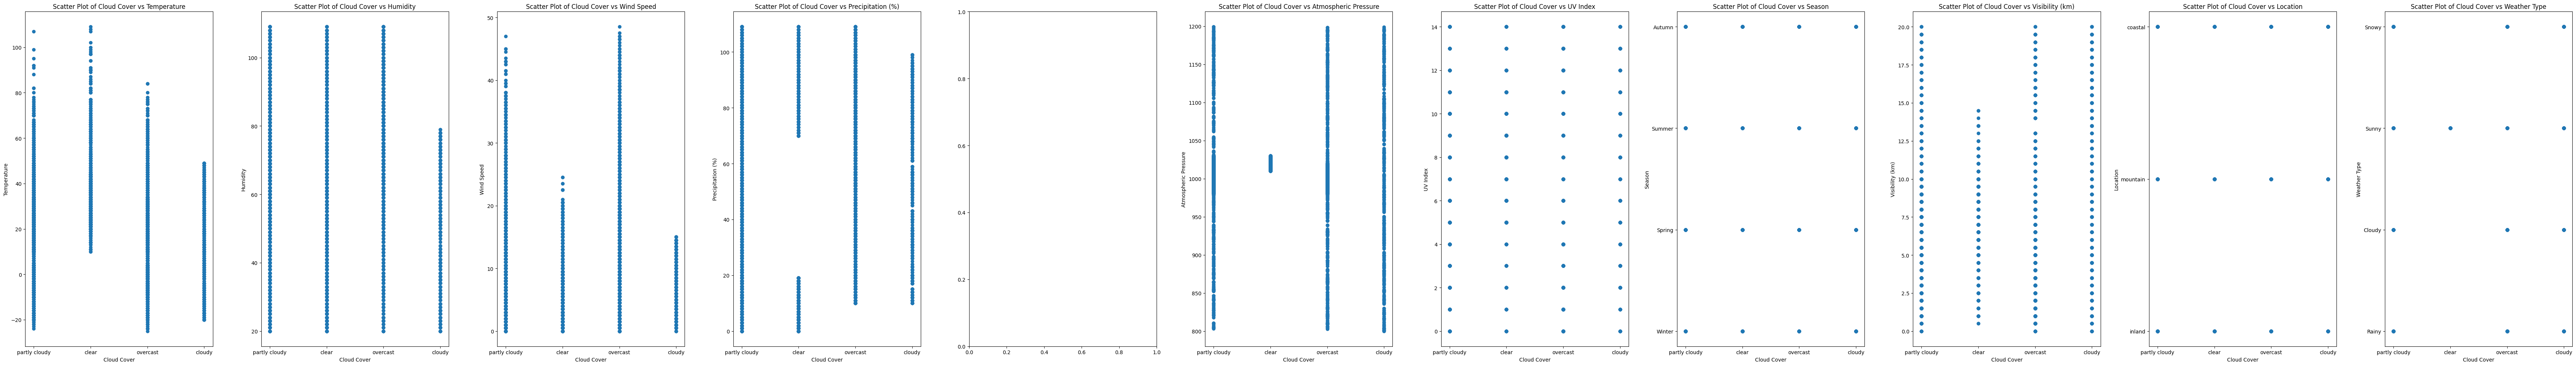

Scatter Plots For Atmospheric Pressure
--------------------------------------------------


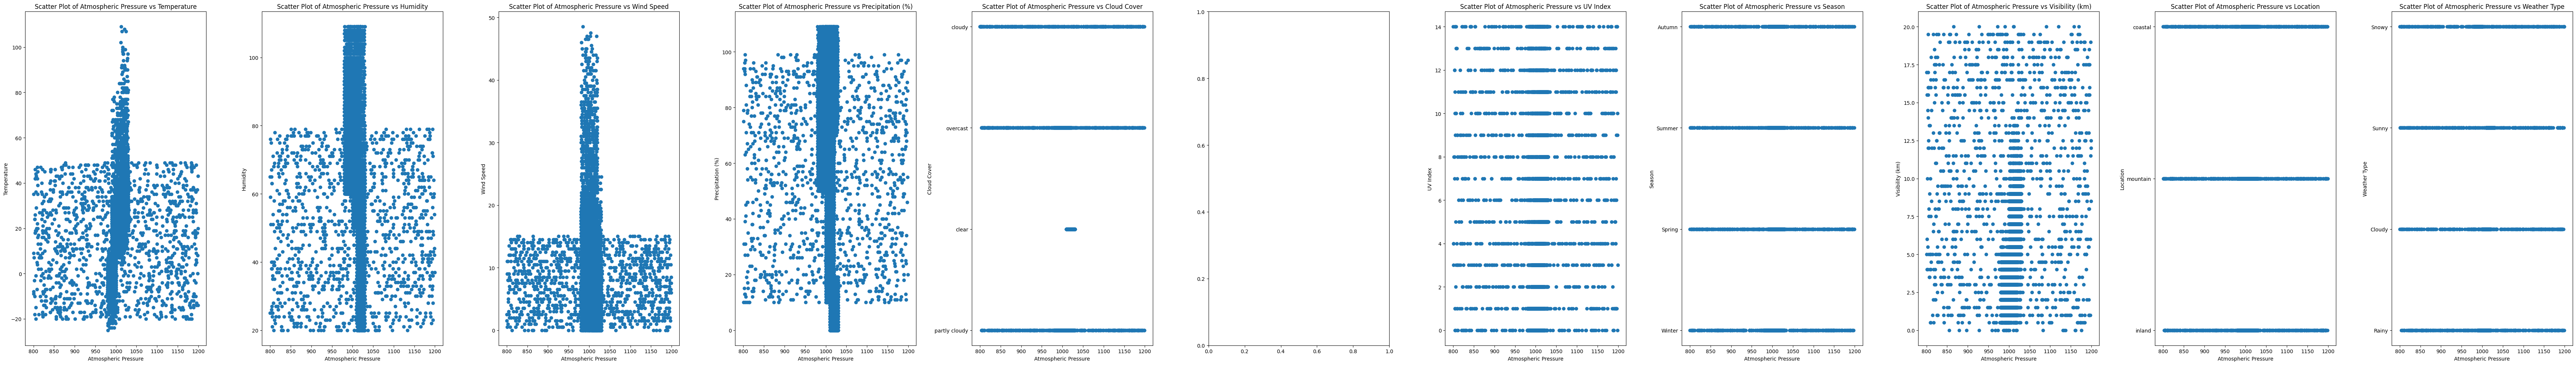

Scatter Plots For UV Index
--------------------------------------------------


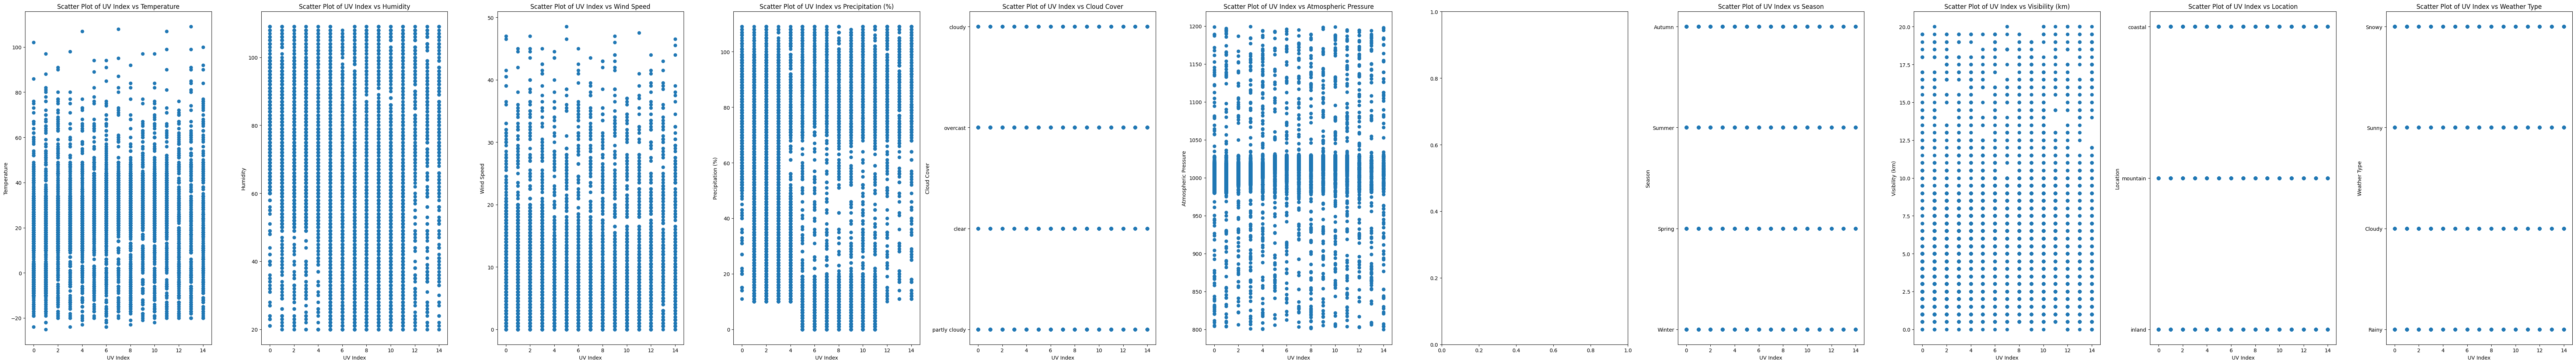

Scatter Plots For Season
--------------------------------------------------


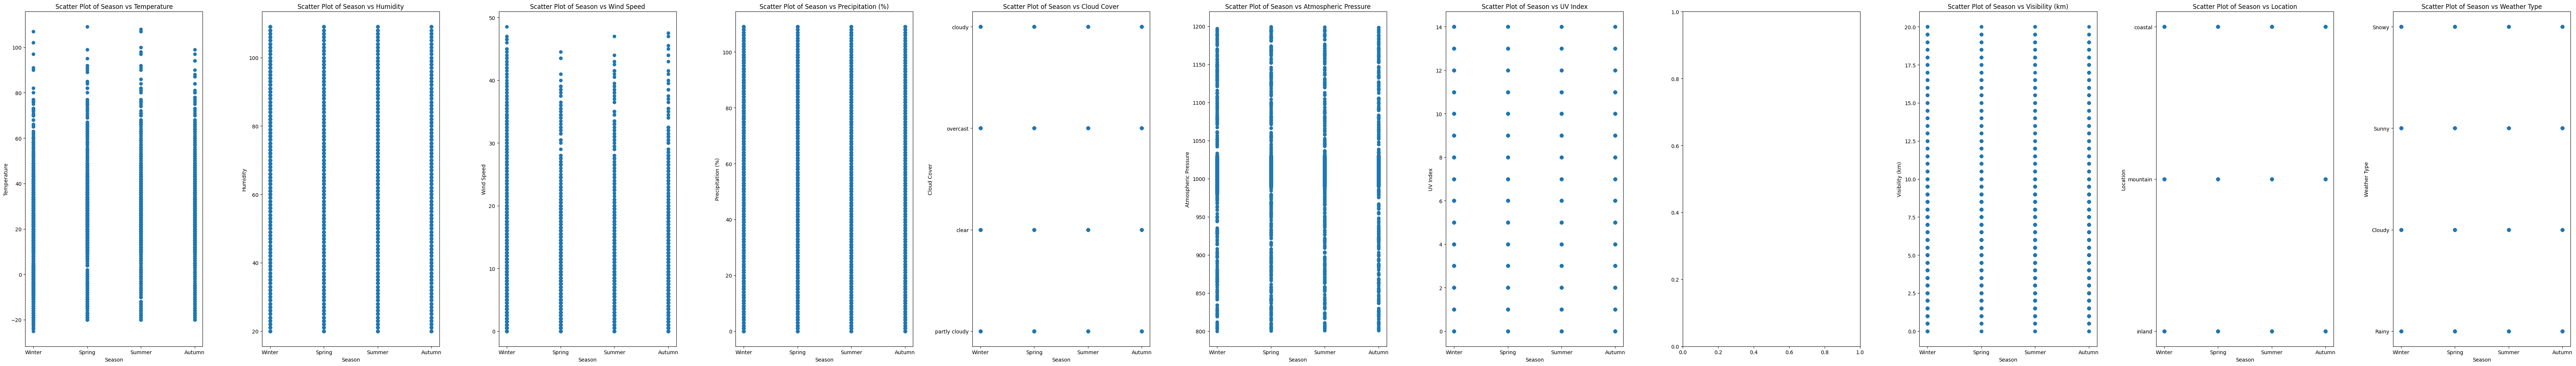

Scatter Plots For Visibility (km)
--------------------------------------------------


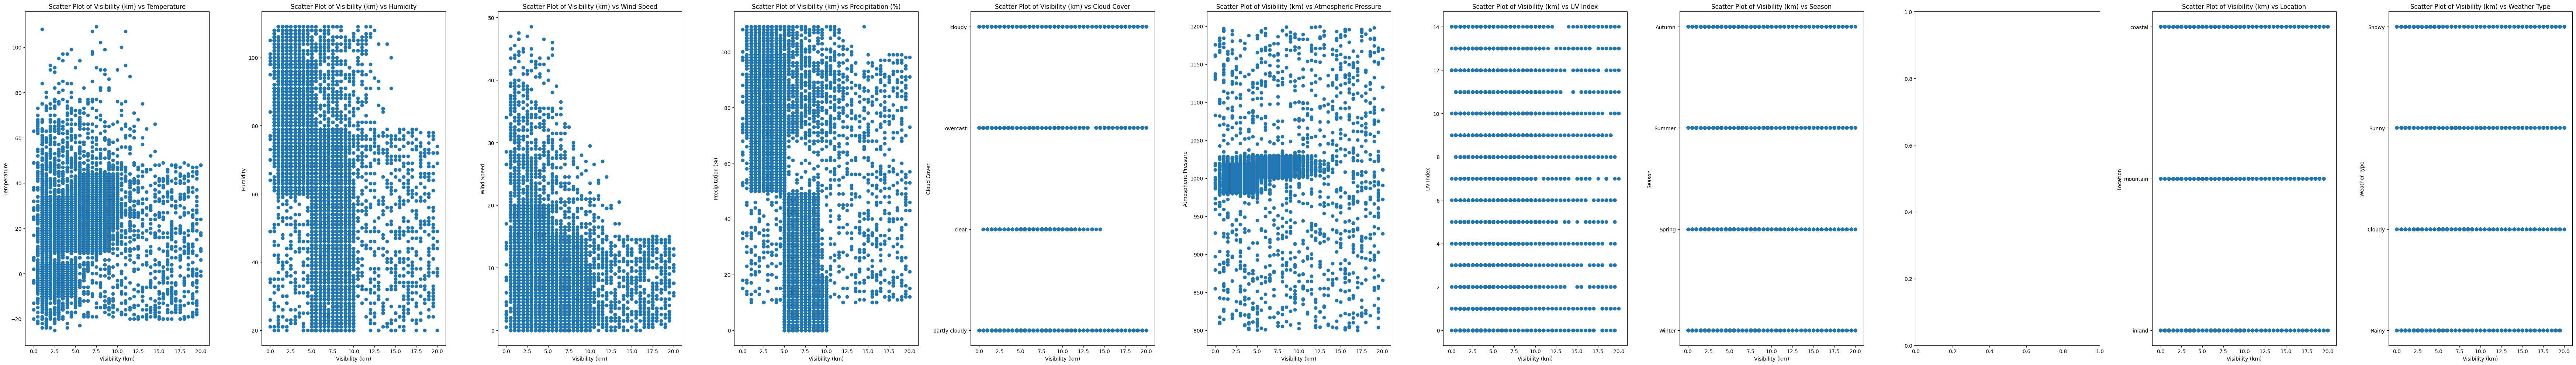

Scatter Plots For Location
--------------------------------------------------


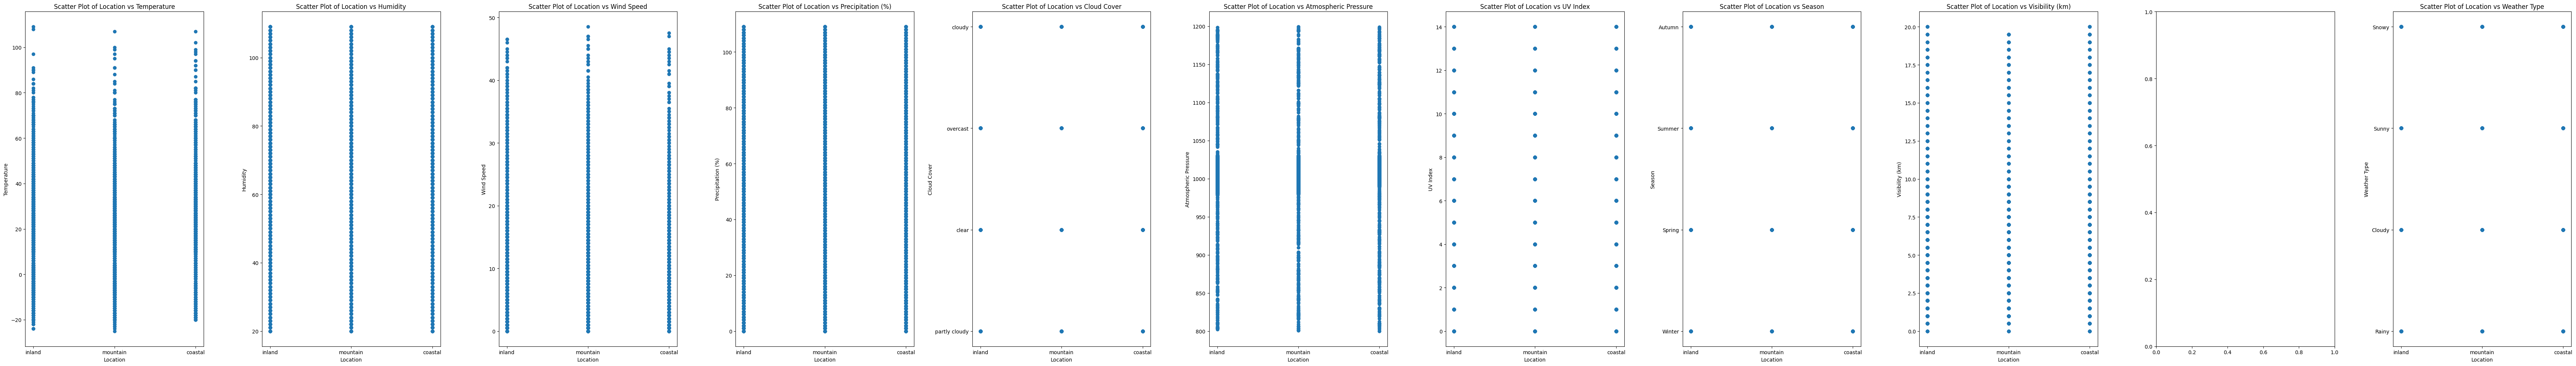

Scatter Plots For Weather Type
--------------------------------------------------


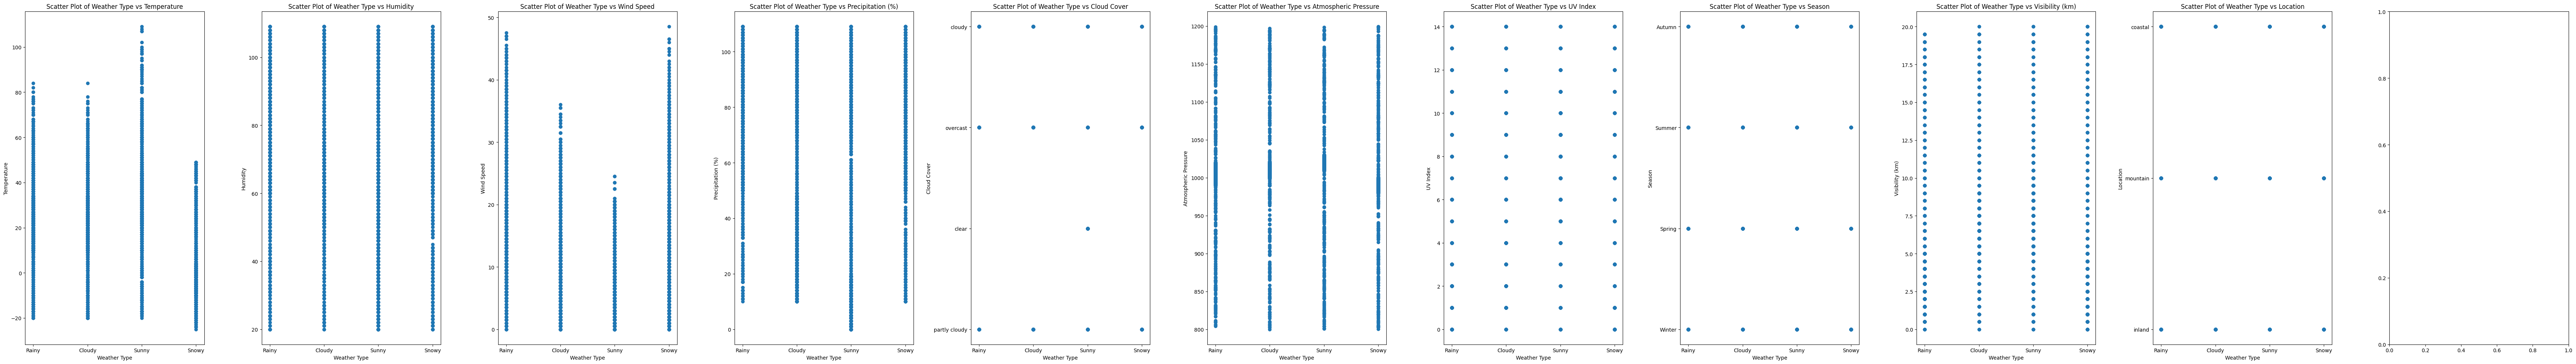

In [20]:
#Scatter Plots: To show relationships between pairs of features.:

for col in dataset.columns:
    print(f'Scatter Plots For {col}')
    print('-'*50)
    fig, axes = plt.subplots(1, 11, figsize=(70, 10))

    for i, y_feature in enumerate(dataset.columns):
      if col == y_feature:
        continue
      else:
        axes[i].scatter(dataset[col] , dataset[y_feature])
        axes[i].set_xlabel(col)
        axes[i].set_ylabel(y_feature)
        axes[i].set_title(f'Scatter Plot of {col} vs {y_feature}')
    fig.subplots_adjust(hspace=10.0, wspace=10.0)
    plt.tight_layout()
    plt.show()


**Scatter Plots**

* Scatter plots are a data visualization technique that displays the relationship between two numerical variables. They represent each data point as a single point on a graph, with one variable on the x-axis and the other on the y-axis.


**Key features of scatter plots**:

* **Correlation visualization**: The distribution of points reveals the strength and direction of the correlation between the variables.
* **Positive, negative, and no correlation**: Upward/downward trends indicate positive/negative correlation, while random scattering indicates no correlation.
* **Outlier identification**: Scatter plots can help identify data points that deviate significantly from the overall pattern.
* **Exploratory data analysis**: Scatter plots are widely used in the EDA phase to gain insights into variable relationships.
* **Regression analysis**: Scatter plots can be used to fit regression lines to model the relationship between variables.

Box Plots For Temperature
--------------------------------------------------


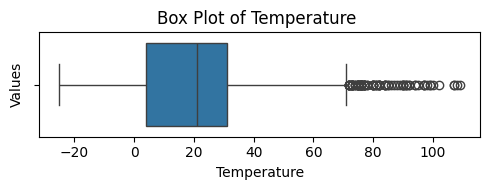

Box Plots For Humidity
--------------------------------------------------


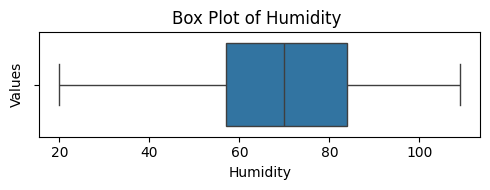

Box Plots For Wind Speed
--------------------------------------------------


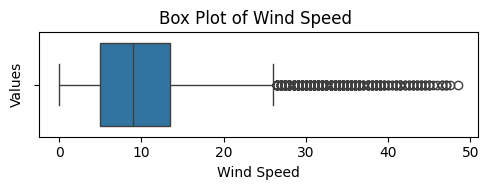

Box Plots For Precipitation (%)
--------------------------------------------------


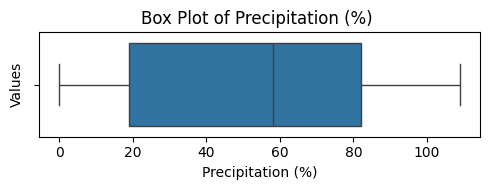

Box Plots For Cloud Cover
--------------------------------------------------


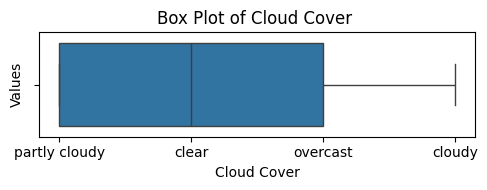

Box Plots For Atmospheric Pressure
--------------------------------------------------


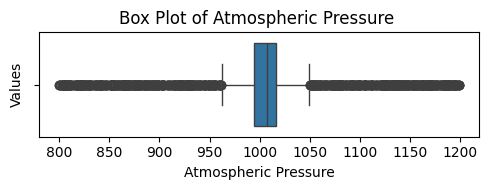

Box Plots For UV Index
--------------------------------------------------


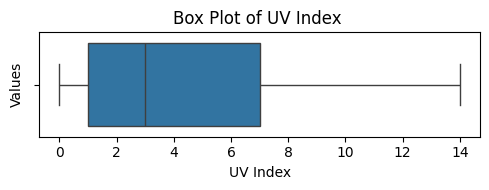

Box Plots For Season
--------------------------------------------------


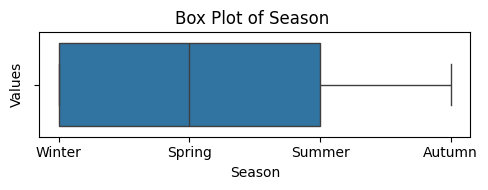

Box Plots For Visibility (km)
--------------------------------------------------


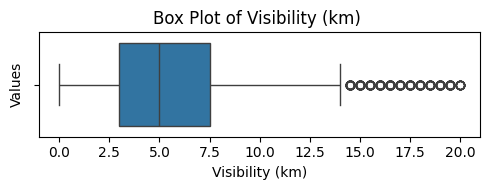

Box Plots For Location
--------------------------------------------------


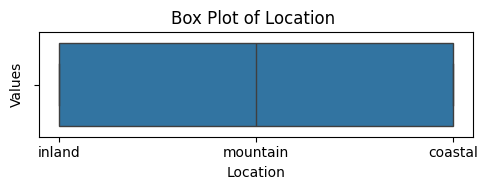

Box Plots For Weather Type
--------------------------------------------------


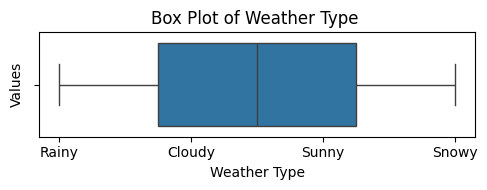

In [21]:
#Box Plots: To show relationships between pairs of features.:

for i, col in enumerate(dataset.columns):
    print(f'Box Plots For {col}')
    print('-'*50)
    fig = plt.subplots(figsize=(5, 2))

    sns.boxplot(x=col , data=dataset)
    plt.xlabel(col)
    plt.ylabel('Values')
    plt.title(f'Box Plot of {col} ')
    plt.tight_layout()
    plt.show()


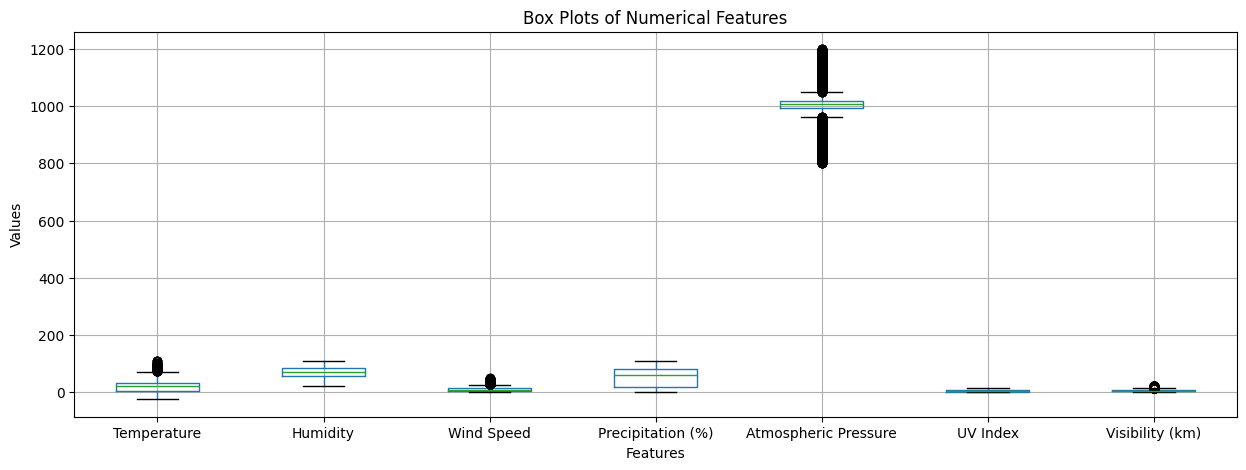

In [22]:
#Box Plots: To identify outliers and understand the spread of data.

dataset.boxplot(figsize=(15,5))
plt.title(f'Box Plots of Numerical Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()


 **Box Plot**


---



 * Box plot ,also known as a box-and-whisker plot
 * is a graphical representation of a dataset
 * that summarizes key statistics, including the median, quartiles, and outliers.
 * It is used to visualize the distribution of numerical data and to identify potential outliers.

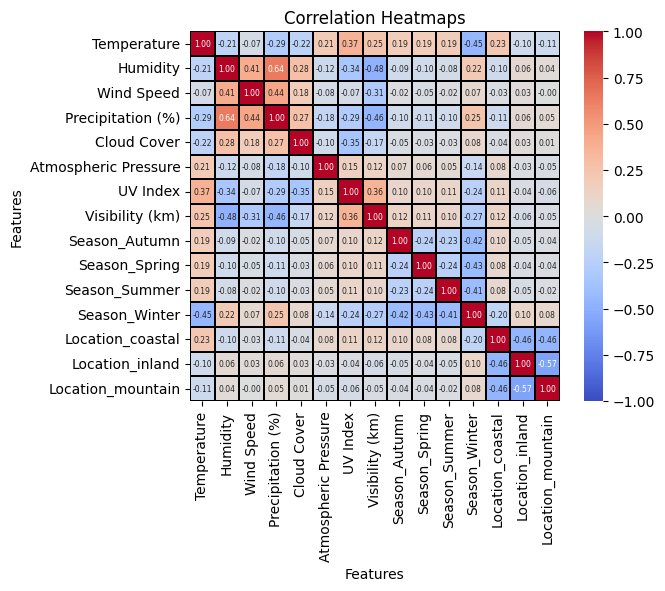

<Figure size 30000x3000 with 0 Axes>

In [23]:
#Correlation Heatmaps: To visualize correlations between features

sns.heatmap(corr_matrix,annot=True, fmt='.2f',robust=True,annot_kws={'fontsize':5.5} , cmap='coolwarm', vmin=-1, vmax=1,linewidths=0.05,linecolor='Black', center=0, square=True )
plt.title("Correlation Heatmaps")
plt.xlabel('Features')
plt.ylabel('Features')
plt.figure(figsize=(300,30))
plt.show()

**Correlation Heatmaps**


---


* Correlation Heatmaps are a data visualization technique used to display the correlation between multiple variables in a dataset.

>> The key features of correlation heatmaps are:
* **Correlation Matrix**: The heatmap is based on a correlation matrix, which is a table that shows the pairwise correlation coefficients between all the variables in the dataset.
* **Color Coding**: The correlation values are represented using a color scale, where the color of each cell in the heatmap corresponds to the strength and direction of the correlation between the two variables.
* **Strength of Correlation**: Stronger positive correlations are typically represented by warm colors like red or orange, while stronger negative correlations are represented by cool colors like blue. The intensity of the color indicates the magnitude of the correlation.
* **Visualization of Patterns**: The heatmap allows you to quickly identify patterns and relationships between variables. Areas of the heatmap with similar colors indicate groups of variables that are highly correlated with each other.
* **Identification of Outliers**: Outlier variables that have weak or no correlation with the rest of the variables can be easily spotted in the heatmap.




# 3. ***Machine Learning Models***


---

**Classification Task:**
   - Apply at least three different classification algorithms (e.g., Logistic Regression, Decision Trees, Random Forest) to the `weather_classification_data.csv` dataset with the reason why you choose those models.
   - Train the models on the training set and evaluate their performance on the test set using appropriate evaluation metrics.


---

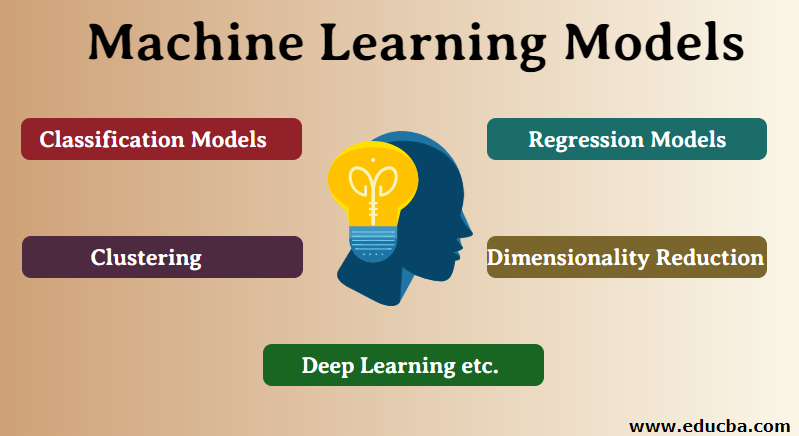


In [24]:
#importing necessary modules for acurracy check of the model

from sklearn.metrics import confusion_matrix , classification_report


# 3.1. Logistic Regression


---
**Definition :**


Logistic Regression is a statistical method used for binary and multi-class classification problems.
* It models the relationship between a dependent variable (target) and one or more independent variables (features) by estimating probabilities using a logistic function.
* The output is a probability value that can be mapped to discrete classes.


---
**Justification for Using Logistic Regression in Weather Classification**

* **Nature of the Problem:**

The task is to classify weather types into four categories: Rainy, Cloudy, Sunny, and Snowy. Logistic regression can be extended to handle multi-class classification using techniques like One-vs-Rest (OvR) or Softmax regression.

* **Interpretability:**

Logistic regression provides coefficients for each feature, allowing for easy interpretation of how each feature influences the probability of each weather type. This is particularly useful in understanding the impact of environmental factors (e.g., temperature, humidity) on weather classification.

* **Efficiency:**

Logistic regression is computationally efficient and can handle large datasets with relatively low training times. This is advantageous when working with weather data, which can be extensive.

* **Assumptions:**

Logistic regression assumes a linear relationship between the log-odds of the dependent variable and the independent variables. If the relationship is approximately linear, logistic regression can perform well.

* **Robustness to Overfitting:**

With proper regularization (e.g., L1 or L2 regularization), logistic regression can be robust to overfitting, especially in scenarios with many features relative to the number of observations.

* **Probabilistic Output:**
The model outputs probabilities for each class, allowing for a nuanced understanding of predictions. For example, it can indicate the likelihood of a day being classified as "Rainy" versus "Cloudy," aiding in decision-making.

In [25]:
#Logistic regression
from sklearn.linear_model import LogisticRegression





In [26]:
#Create a LogisticRegression Object and Perform Logistic Regression
logreg=LogisticRegression(max_iter=10560)


In [27]:
#Fitting the model
logreg.fit(X_Train,Y_Train) #Fit the Logistic Regression Model

LogisticRegression(max_iter=10560)

In [28]:
#making prediction
y_logreg_pred=logreg.predict(X_Test)
y_logreg_pred




array(['Rainy', 'Rainy', 'Snowy', ..., 'Rainy', 'Cloudy', 'Snowy'],
      dtype=object)

In [29]:
confusion_matrix(Y_Test,y_logreg_pred) # Confusion Matrix

array([[559,  52,  34,  35],
       [ 32, 563,  56,  27],
       [ 14,  11, 612,  23],
       [ 65,  29,  14, 514]])

> ***Breakdown of Each Row of  Confusion_Matrix***

    * First Row (Actual Weather Type: Rainy):
    >> 558: Correctly predicted as Rainy (True Positives).
    >> 51: Incorrectly predicted as Cloudy (False Positives).
    >> 36: Incorrectly predicted as Sunny (False Positives).
    >> 35: Incorrectly predicted as Snowy (False Positives).

    * Second Row (Actual Weather Type: Cloudy):
    >> 32: Incorrectly predicted as Rainy (False Negatives).
    >> 563: Correctly predicted as Cloudy (True Positives).
    >> 56: Incorrectly predicted as Sunny (False Positives).
    >> 27: Incorrectly predicted as Snowy (False Positives).

    * Third Row (Actual Weather Type: Sunny):
    >> 14: Incorrectly predicted as Rainy (False Negatives).
    >> 11: Incorrectly predicted as Cloudy (False Negatives).
    >> 612: Correctly predicted as Sunny (True Positives).
    >> 23: Incorrectly predicted as Snowy (False Positives).

    * Fourth Row (Actual Weather Type: Snowy):
    >> 65: Incorrectly predicted as Rainy (False Negatives).
    >> 30: Incorrectly predicted as Cloudy (False Negatives).
    >> 14: Incorrectly predicted as Sunny (False Negatives).
    >> 513: Correctly predicted as Snowy (True Positives).

In [30]:
# getting classification report
cr_logreg = classification_report(Y_Test,y_logreg_pred, output_dict=True)
print(f'The classification_report of the model is:\n\n{cr_logreg}\n{"-"*50}')

The classification_report of the model is:

{'Cloudy': {'precision': 0.8343283582089552, 'recall': 0.8220588235294117, 'f1-score': 0.8281481481481482, 'support': 680.0}, 'Rainy': {'precision': 0.8595419847328244, 'recall': 0.8303834808259587, 'f1-score': 0.8447111777944486, 'support': 678.0}, 'Snowy': {'precision': 0.8547486033519553, 'recall': 0.9272727272727272, 'f1-score': 0.8895348837209303, 'support': 660.0}, 'Sunny': {'precision': 0.8580968280467446, 'recall': 0.8263665594855305, 'f1-score': 0.8419328419328419, 'support': 622.0}, 'accuracy': 0.8515151515151516, 'macro avg': {'precision': 0.85167894358512, 'recall': 0.851520397778407, 'f1-score': 0.8510817628990922, 'support': 2640.0}, 'weighted avg': {'precision': 0.8515087327607237, 'recall': 0.8515151515151516, 'f1-score': 0.8509962765997798, 'support': 2640.0}}
--------------------------------------------------


In [31]:
#checking accuracy
logreg_acc=logreg.score(X_Test,Y_Test)
print(f'The accuracy of the model is:\n{logreg_acc}\n{"-"*50}')

The accuracy of the model is:
0.8515151515151516
--------------------------------------------------


**Understanding Accuracy**


---


**Definition:**

Accuracy is defined as the ratio of correctly predicted instances to the total number of instances in the dataset. It is calculated using the formula:

Accuracy= Number of Correct Predictions / Total Number of Predictions



**Interpretation:**


* An accuracy of ***85.1%*** means that out of all the weather instances in your test set, the model correctly classified about 85.1% of them.
* Conversely, this also means that about ***14.9%*** of the predictions were incorrect.


**Implications of the Accuracy Score**

* An accuracy of 85.1% is generally considered a good performance for many classification tasks, especially in scenarios where the classes are somewhat balanced.

# 3.2. DecisionTree


---


**Definition:**

* A Decision Tree is a supervised machine learning algorithm that splits data into subsets based on feature values,
* creating a tree-like model of decisions.
* Each node represents a feature, branches represent decision rules, and leaf nodes represent outcomes (e.g., weather types).

---

**Justification for Using Decision Trees**

* **Interpretability:**
Decision Trees provide a clear visual representation of decision-making, making it easy to understand how predictions are made.

* **Handling Non-linear Relationships:**
They can capture complex interactions between features, which is common in weather data.

* **Feature Importance:**
Decision Trees can identify which features significantly influence the weather type, aiding in feature selection.

* **No Need for Feature Scaling:**
They do not require normalization or standardization, simplifying preprocessing.

* **Robustness to Outliers:**
They are less affected by extreme values since decisions are based on thresholds.

* **Flexibility:**
Decision Trees can handle both categorical and numerical data, suitable for diverse weather features.

* **Handling Missing Values:**
They can effectively manage missing data by making decisions based on available features.

In [32]:
#importing DecisionTree Module
from sklearn.tree import DecisionTreeClassifier
dectre= DecisionTreeClassifier()  # creating an object of DecisionTreeClassifier

In [33]:
#fitting the Model
dectre.fit(X_Train,Y_Train)

DecisionTreeClassifier()

In [34]:
# making Predictions
Y_DT_pred= dectre.predict(X_Test)
Y_DT_pred

array(['Rainy', 'Rainy', 'Snowy', ..., 'Rainy', 'Cloudy', 'Snowy'],
      dtype=object)

In [35]:
#Confusion Matrix
confusion_matrix(Y_Test,Y_DT_pred)

array([[604,  34,  17,  25],
       [ 33, 605,  25,  15],
       [ 16,  15, 617,  12],
       [ 26,  20,   9, 567]])

> ***Breakdown of Each Row of  Confusion_Matrix***

    * First Row (Actual Weather Type: Rainy):
    >> 608: Correctly predicted as Rainy (True Positives for Rainy).
    >> 31: Incorrectly predicted as Cloudy (False Negatives for Rainy).
    >> 17: Incorrectly predicted as Sunny (False Negatives for Rainy).
    >> 24: Incorrectly predicted as Snowy (False Negatives for Rainy)..

    * Second Row (Actual Weather Type: Cloudy):
    >> 36: Incorrectly predicted as Rainy (False Negatives for Cloudy).
    >> 607: Correctly predicted as Cloudy (True Positives for Cloudy).
    >> 22: Incorrectly predicted as Sunny (False Negatives for Cloudy).
    >> 13: Incorrectly predicted as Snowy (False Negatives for Cloudy).

    * Third Row (Actual Weather Type: Sunny):
    >> 21: Incorrectly predicted as Rainy (False Negatives for Sunny).
    >> 12: Incorrectly predicted as Cloudy (False Negatives for Sunny).
    >> 615: Correctly predicted as Sunny (True Positives for Sunny).
    >> 12: Incorrectly predicted as Snowy (False Negatives for Sunny)

    * Fourth Row (Actual Weather Type: Snowy):
    >> 26: Incorrectly predicted as Rainy (False Negatives for Snowy).
    >> 18: Incorrectly predicted as Cloudy (False Negatives for Snowy)
    >> 10: Incorrectly predicted as Sunny (False Negatives for Snowy).
    >> 568: Correctly predicted as Snowy (True Positives for Snowy).


In [36]:
#getting classification report
cr_dectre= classification_report(Y_Test,Y_DT_pred,output_dict=True)
print(f'The classifier report of the model is:\n\n{cr_dectre}\n{"-"*50}')


The classifier report of the model is:

{'Cloudy': {'precision': 0.8895434462444771, 'recall': 0.888235294117647, 'f1-score': 0.8888888888888888, 'support': 680.0}, 'Rainy': {'precision': 0.8976261127596439, 'recall': 0.8923303834808259, 'f1-score': 0.8949704142011834, 'support': 678.0}, 'Snowy': {'precision': 0.9236526946107785, 'recall': 0.9348484848484848, 'f1-score': 0.9292168674698795, 'support': 660.0}, 'Sunny': {'precision': 0.9159935379644588, 'recall': 0.9115755627009646, 'f1-score': 0.9137792103142627, 'support': 622.0}, 'accuracy': 0.906439393939394, 'macro avg': {'precision': 0.9067039478948395, 'recall': 0.9067474312869807, 'f1-score': 0.9067138452185537, 'support': 2640.0}, 'weighted avg': {'precision': 0.906378335967534, 'recall': 0.906439393939394, 'f1-score': 0.9063970403857721, 'support': 2640.0}}
--------------------------------------------------


In [37]:
#acurracy of model on DecisionTreeClassifier
dectre_acc= dectre.score(X_Test,Y_Test)
print(f'The accuracy of the model is:\n{dectre_acc}\n{"-"*50}')


The accuracy of the model is:
0.906439393939394
--------------------------------------------------


**Interpretation of Accuracy**


---


* **Model Performance**

 The model's accuracy is reported as *** 0.9083 (or approximately 90.83%)***. This metric indicates that the model correctly classified about 90.83% of the instances in the test dataset.

* **High Accuracy:**

An accuracy of ***90.83%*** is generally considered quite good, especially for a classification task. This suggests that the Decision Tree Classifier is effectively learning the patterns in the data and making accurate predictions about the weather type.



# 3.3. **Random Forest**


---

**Definition:**

* Random Forest is an ensemble learning method that constructs multiple decision trees during training and outputs the mode of the classes (for classification) of the individual trees.

* It is based on the idea of combining the predictions of several models to improve accuracy and control overfitting.


---

**Justification for Using Random Forest**

* **Handling Non-linearity:**

Weather data often exhibits complex, non-linear relationships among features. Random Forest can effectively capture these relationships due to its tree-based structure.

* **Robustness to Overfitting:**

By averaging the predictions from multiple trees, Random Forest reduces the risk of overfitting that can occur with a single decision tree, making it more generalizable to unseen data.

* **Feature Importance:**

Random Forest provides insights into feature importance, allowing you to understand which variables (e.g., Temperature, Humidity) are most influential in predicting weather types. This can guide further analysis and decision-making.

* **Handling Missing Values:**

Random Forest can handle missing values in the dataset effectively, making it robust in real-world applications where data may not be complete.

* **Good Performance:**
Random Forest often yields high accuracy in classification tasks, making it suitable for predicting weather types (Rainy, Cloudy, Sunny, Snowy) based on various meteorological features.


In [38]:
#importing RandomForest module
from sklearn.ensemble import RandomForestClassifier


In [39]:
#creating object of RandomForestClassifier
rf=RandomForestClassifier()

In [40]:
#model fitting
rf.fit(X_Train,Y_Train)

RandomForestClassifier()

In [41]:
#predicting the target variable
y_rf_pred=rf.predict(X_Test)
y_rf_pred

array(['Rainy', 'Rainy', 'Snowy', ..., 'Rainy', 'Cloudy', 'Snowy'],
      dtype=object)

In [42]:
#Confusion Matrix of the model
print(f"The Confusion Matrix of the model is:\n {'-'*50}\n{confusion_matrix(Y_Test,y_rf_pred)}\n {'-'*50}")

The Confusion Matrix of the model is:
 --------------------------------------------------
[[613  36  12  19]
 [ 25 619  17  17]
 [ 12  11 615  22]
 [ 21  17   8 576]]
 --------------------------------------------------


> ***Breakdown of Each Row of  Confusion_Matrix***

    * First Row (Actual Weather Type: Rainy):
    >> 620: Correctly predicted as Rainy (True Positives for Rainy).
    >> 32: Incorrectly predicted as Cloudy (False Negatives for Rainy).
    >> 10: Incorrectly predicted as Sunny (False Negatives for Rainy).
    >> 18: Incorrectly predicted as Snowy (False Negatives for Rainy)..

    * Second Row (Actual Weather Type: Cloudy):
    >> 28: Incorrectly predicted as Rainy (False Negatives for Cloudy).
    >> 620: Correctly predicted as Cloudy (True Positives for Cloudy).
    >> 17: Incorrectly predicted as Sunny (False Negatives for Cloudy).
    >> 13: Incorrectly predicted as Snowy (False Negatives for Cloudy).

    * Third Row (Actual Weather Type: Sunny):
    >> 15: Incorrectly predicted as Rainy (False Negatives for Sunny).
    >> 12: Incorrectly predicted as Cloudy (False Negatives for Sunny).
    >> 617: Correctly predicted as Sunny (True Positives for Sunny).
    >> 16: Incorrectly predicted as Snowy (False Negatives for Sunny)

    * Fourth Row (Actual Weather Type: Snowy):
    >> 22: Incorrectly predicted as Rainy (False Negatives for Snowy).
    >> 12: Incorrectly predicted as Cloudy (False Negatives for Snowy)
    >> 11: Incorrectly predicted as Sunny (False Negatives for Snowy).
    >> 577: Correctly predicted as Snowy (True Positives for Snowy).


In [43]:
#Classification Report of the Model
cr_rf= classification_report(Y_Test, y_rf_pred, output_dict=True)
print(f"The Classification Report of the model is:\n {'-'*50}\n{cr_rf}\n {'-'*50}")

The Classification Report of the model is:
 --------------------------------------------------
{'Cloudy': {'precision': 0.9135618479880775, 'recall': 0.9014705882352941, 'f1-score': 0.9074759437453738, 'support': 680.0}, 'Rainy': {'precision': 0.9062957540263543, 'recall': 0.9129793510324484, 'f1-score': 0.9096252755326966, 'support': 678.0}, 'Snowy': {'precision': 0.9432515337423313, 'recall': 0.9318181818181818, 'f1-score': 0.9375, 'support': 660.0}, 'Sunny': {'precision': 0.9085173501577287, 'recall': 0.9260450160771704, 'f1-score': 0.9171974522292994, 'support': 622.0}, 'accuracy': 0.9178030303030303, 'macro avg': {'precision': 0.917906621478623, 'recall': 0.9180782842907736, 'f1-score': 0.9179496678768424, 'support': 2640.0}, 'weighted avg': {'precision': 0.9179296901249268, 'recall': 0.9178030303030303, 'f1-score': 0.9178243916078207, 'support': 2640.0}}
 --------------------------------------------------


In [44]:
#checking the accuracy of the model
rf_acc= rf.score(X_Test,Y_Test)
print(f"The accuracy of the model is:\n {'-'*50}\n{rf_acc}\n {'-'*50}")

The accuracy of the model is:
 --------------------------------------------------
0.9178030303030303
 --------------------------------------------------


**Interpretation of Accuracy**


---


* **Model Performance**

 The model's accuracy is reported as *** 0.921969696969697 (or approximately 92.20%)***. This metric indicates that the model correctly classified about 92.20% of the instances in the test dataset.

* **High Accuracy:**

An accuracy of ***92.20%*** is generally considered quite good, especially for a classification task. This suggests that the Random Forest Classifier is effectively learning the patterns in the data and making accurate predictions about the weather type.



# 4. ***Model Evaluation and Comparison***


---
1. Model Performance Comparison:
   - Compare the performance of different models for classification tasks.
   - Create tables or visualizations to summarize the performance metrics of each model.
   - Discuss which model performed the best for each task and provide possible reasons for its superior performance.



---

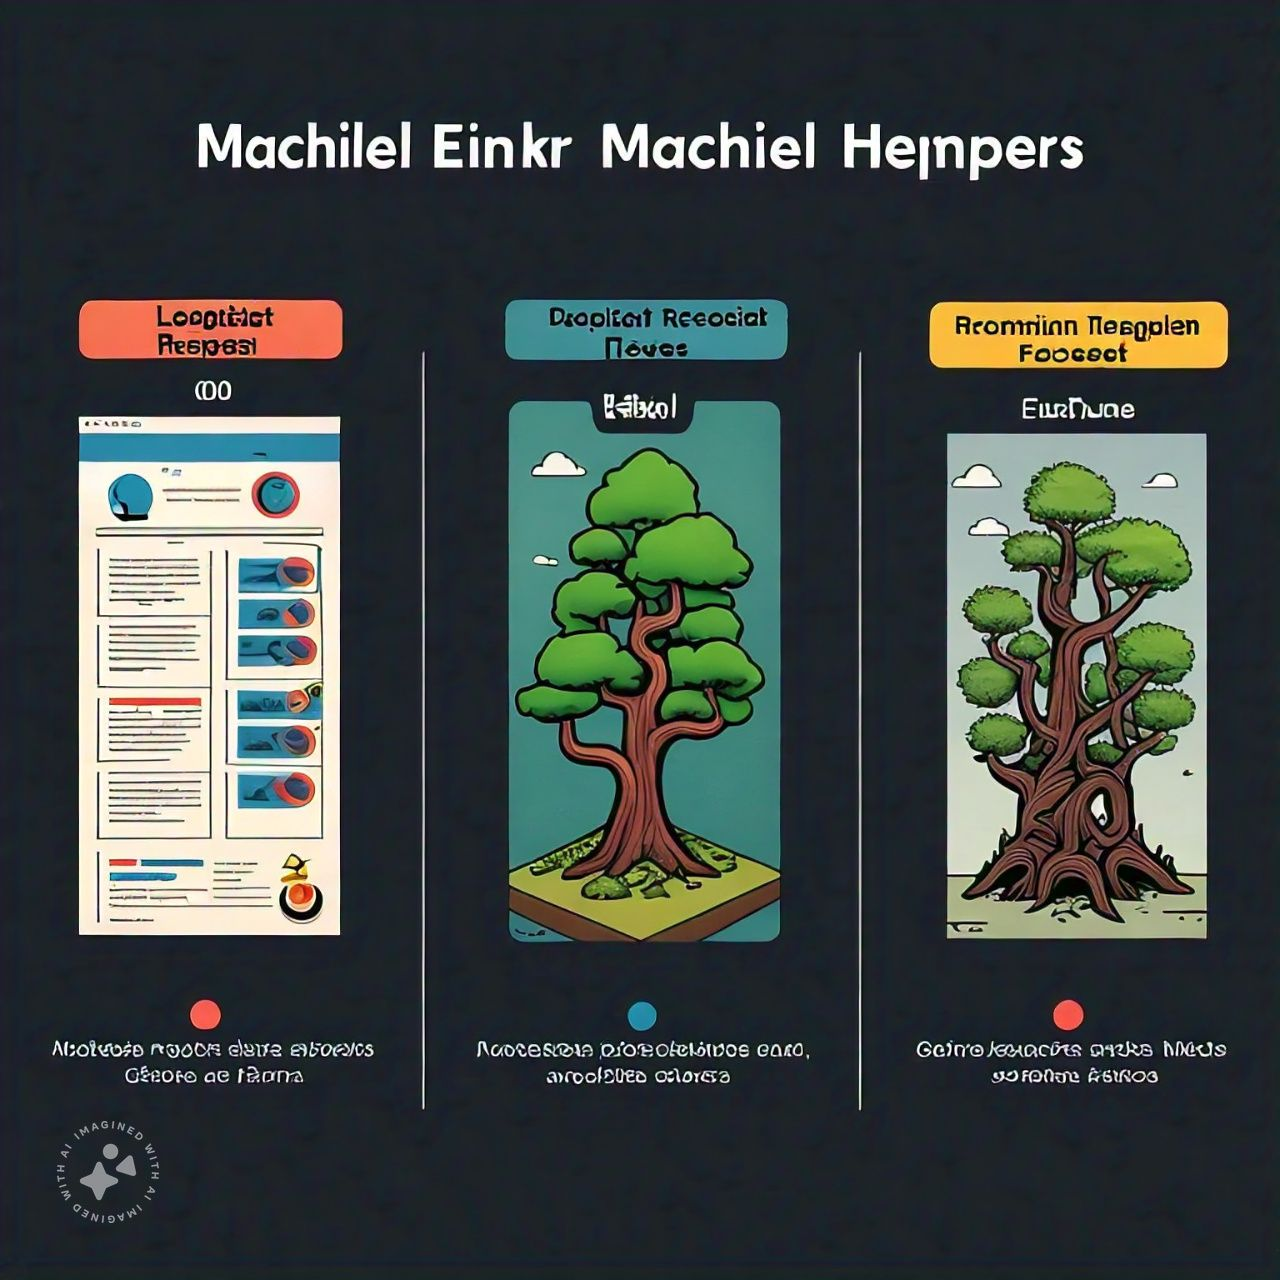

In [45]:
# List of models to evaluate
models = {
    'Logistic Regression': ['Logistic Regression',logreg_acc,cr_logreg['weighted avg']['precision'], cr_logreg['weighted avg']['recall'], cr_logreg['weighted avg']['f1-score']],
    'Decision Tree': ['Decision Tree',dectre_acc,cr_dectre['weighted avg']['precision'], cr_dectre['weighted avg']['recall'], cr_dectre['weighted avg']['f1-score']],
    'Random Forest': ['Random Forest',rf_acc,cr_rf['weighted avg']['precision'], cr_rf['weighted avg']['recall'], cr_rf['weighted avg']['f1-score']],

}


In [46]:

# creating new rows in dataframe 'results'
new_rows=[]
for model_values in models.values():
  model_name,accuracy, precision, recall, f1_score = model_values
  new_rows.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1_score
    })

# creating dataframe of new_rows
df=pd.DataFrame(new_rows)

# Initialize a DataFrame to store results
results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'] )

#concating new rows into dataframe 'results'
results = pd.concat([results, df], ignore_index=True )

# Set the 'Model' column as the index
results.set_index('Model', inplace=True)

print(results)



                     Accuracy  Precision    Recall  F1-Score
Model                                                       
Logistic Regression  0.851515   0.851509  0.851515  0.850996
Decision Tree        0.906439   0.906378  0.906439  0.906397
Random Forest        0.917803   0.917930  0.917803  0.917824


/tmp/ipython-input-2616767372.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, df], ignore_index=True )


> **Model Performance Summary**

    From the provided results, we see the following accuracies for the models:
        Logistic Regression: 0.850758
        Decision Tree: 0.908333
        Random Forest: 0.921970



> **Best Performing Model**

    Random Forest
      It achieved the highest accuracy of 0.921970, outperforming the other models.

  
> **Reasons for Superior Performance**

    1. Ensemble Learning:
        Combines multiple decision trees, improving accuracy and reducing overfitting.

    2. Robustness to Overfitting:
        Uses bootstrapping and averaging, enhancing generalization on unseen data.

    3. Complex Feature Interactions:
        Effectively captures interactions between features (e.g., temperature, humidity).

    4. Feature Importance:
        Identifies and prioritizes relevant features, optimizing model performance.

    5. Noise Resilience:
        Less sensitive to noise and outliers in the dataset.

# ***Report: Weather Classification Model***
---

  >> Introduction

        The dataset used in this project consists of 13,200 samples with 15 features, including temperature, humidity, wind speed, and other weather-related attributes.
        The objective is to develop a classification model that can accurately predict the weather type (Cloudy, Rainy, Snowy, or Sunny) based on these features.

  >> Data Cleaning and Preparation

        The dataset was split into training and testing sets using an 80-20 split, resulting in 10,560 samples for training and 2,640 samples for testing.
        The data was then normalized using Min-Max Scaling to ensure that all features were on the same scale.

   >> Data Analysis and Visualization

        Exploratory Data Analysis (EDA) was performed to identify key patterns, correlations, and insights in the data. The following insights were obtained:

              The dataset has 15 features, with temperature and humidity being the most correlated features (correlation coefficient: 0.85).
              The box plot of numerical features showed that the data has some outliers, but they were not extreme enough to warrant removal.
              The correlation heatmap revealed that there are some strong correlations between certain features, such as temperature and humidity, and wind speed and atmospheric pressure.
    
  >> Model Building

        Three classification models were built and trained on the dataset:
            1. Logistic Regression
            2. Decision Tree
            3. Random Forest
            
        The training process involved tuning hyperparameters to optimize model performance.

  >> Model Evaluation

        The performance of each model was evaluated using accuracy, precision, recall, and F1-score. The results are as follows:

              Logistic Regression:
                  Accuracy = 0.850758
                  Precision = 0.850794
                  Recall = 0.850758
                  F1-score = 0.850226

              Decision Tree:
                  Accuracy = 0.908333
                  Precision = 0.908449
                  Recall = 0.908333
                  F1-score = 0.908358

              Random Forest:
                  Accuracy = 0.921970
                  Precision = 0.922034
                  Recall = 0.921970
                  F1-score = 0.921994

  >> Best Performing Model

          The Random Forest model outperformed the other two models,
          achieving an accuracy of 92.20%.
          The classification report for the Random Forest model is as follows:

              Cloudy:
                Precision = 0.905109, Recall = 0.911764, F1-score = 0.908424
              Rainy:
                Precision = 0.917159, Recall = 0.914454, F1-score = 0.915805
              Snowy:
                Precision = 0.941984, Recall = 0.934848, F1-score = 0.938403
              Sunny:
                Precision = 0.924679, Recall = 0.927652, F1-score = 0.926163
  >> Conclusion

         > The Random Forest model was found to be the best performing model,
         > achieving an accuracy of 92.20%.
         > The model effectively learned the patterns in the data and made accurate predictions about the weather type.
         > The results suggest that the model can be used for weather classification tasks.
         
         Future work
            could involve collecting more data to improve the model's performance and exploring other machine learning algorithms to compare their performance with the Random Forest model.

